In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import os 
import tqdm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
sns.set_theme(style="white", context="talk", palette="muted")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,         
    'axes.titlesize': 15,
    'axes.labelsize': 13,    
    'legend.fontsize': 11,   
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100
})

In [3]:
# Read config.yaml
with open('../configs/config_gogounou.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# extract data params
data_params = config['data_params']

### Read the csv file

In [4]:
dataset_path = data_params['data_path'] + 'raw/' + data_params['dataset']
data = pd.read_csv(dataset_path)  
data.head()

,DATE,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,Moving_Sum_6,SPI6
0,31/1/1981,97.82,22.08,39.25,57.25,2.52,0.57,NaN,NaN,0.00,NaN,NaN,NaN
1,28/2/1981,97.63,26.39,29.56,77.38,2.44,0.54,NaN,NaN,0.00,NaN,NaN,NaN
2,31/3/1981,97.55,30.10,41.06,147.19,2.17,0.52,NaN,NaN,5.27,NaN,NaN,NaN
3,30/4/1981,97.46,30.56,54.75,212.19,2.57,0.52,NaN,NaN,52.73,NaN,NaN,NaN
4,31/5/1981,97.65,27.81,73.25,225.06,2.16,0.52,NaN,NaN,100.20,NaN,NaN,NaN


In [5]:
dataset_path

'../datasets/raw/Gogounou_with_SPI6.csv'

In [6]:
# Ensure the date column is a datetime
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)

# Set the date column as the index and drop it from the columns
data = data.set_index('DATE')

# data.head()
data

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,Moving_Sum_6,SPI6
DATE,,,,,,,,,,,,
1981-01-31,97.82,22.08,39.25,57.25,2.52,0.57,NaN,NaN,0.00,NaN,NaN,NaN
1981-02-28,97.63,26.39,29.56,77.38,2.44,0.54,NaN,NaN,0.00,NaN,NaN,NaN
1981-03-31,97.55,30.10,41.06,147.19,2.17,0.52,NaN,NaN,5.27,NaN,NaN,NaN
1981-04-30,97.46,30.56,54.75,212.19,2.57,0.52,NaN,NaN,52.73,NaN,NaN,NaN
1981-05-31,97.65,27.81,73.25,225.06,2.16,0.52,NaN,NaN,100.20,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,97.84,25.24,86.38,225.00,1.55,0.64,83.73,37.34,329.91,16.25,780.26,1.042519
2021-09-30,97.82,25.66,84.12,196.75,1.34,0.72,70.75,36.79,156.73,17.49,936.99,1.545549
2021-10-31,97.71,27.06,75.00,154.62,1.27,0.69,49.52,34.85,37.34,21.47,946.09,1.574756


Delete the 'Moving_Sum_6' column (it is not a variable but just serve to compute SPI6)

In [7]:
data = data.drop(columns='Moving_Sum_6', axis=1)
data

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,97.82,22.08,39.25,57.25,2.52,0.57,NaN,NaN,0.00,NaN,NaN
1981-02-28,97.63,26.39,29.56,77.38,2.44,0.54,NaN,NaN,0.00,NaN,NaN
1981-03-31,97.55,30.10,41.06,147.19,2.17,0.52,NaN,NaN,5.27,NaN,NaN
1981-04-30,97.46,30.56,54.75,212.19,2.57,0.52,NaN,NaN,52.73,NaN,NaN
1981-05-31,97.65,27.81,73.25,225.06,2.16,0.52,NaN,NaN,100.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,97.84,25.24,86.38,225.00,1.55,0.64,83.73,37.34,329.91,16.25,1.042519
2021-09-30,97.82,25.66,84.12,196.75,1.34,0.72,70.75,36.79,156.73,17.49,1.545549
2021-10-31,97.71,27.06,75.00,154.62,1.27,0.69,49.52,34.85,37.34,21.47,1.574756


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 1981-01-31 to 2021-12-31
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PS                 492 non-null    float64
 1   T2M                492 non-null    float64
 2   RH2M               492 non-null    float64
 3   WD2M               492 non-null    float64
 4   WS2M               492 non-null    float64
 5   GWETPROF           492 non-null    float64
 6   CLOUD_AMT          456 non-null    float64
 7   TOA_SW_DWN         456 non-null    float64
 8   PRECTOTCORR_SUM    492 non-null    float64
 9   ALLSKY_SFC_SW_DWN  456 non-null    float64
 10  SPI6               487 non-null    float64
dtypes: float64(11)
memory usage: 46.1 KB


In [9]:
data.describe()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,456.000000,456.000000,492.000000,456.000000,4.870000e+02
mean,97.700183,27.161728,56.772053,157.327073,2.101260,0.555183,52.638421,35.357149,75.467886,19.951557,3.647550e-18
std,0.142361,2.476157,21.923493,68.178655,0.496826,0.064288,20.386864,2.406505,90.232416,1.733348,1.000000e+00
min,97.270000,20.690000,14.190000,27.560000,1.200000,0.480000,8.800000,30.730000,0.000000,15.120000,-1.461751e+00
25%,97.600000,25.510000,37.425000,79.090000,1.677500,0.510000,33.357500,33.817500,0.000000,18.690000,-9.709171e-01
50%,97.730000,26.415000,59.405000,191.125000,2.130000,0.530000,58.950000,36.800000,31.640000,20.055000,-1.633797e-02
75%,97.810000,29.012500,77.880000,216.652500,2.450000,0.590000,69.242500,37.142500,142.380000,21.122500,8.447635e-01
max,98.110000,33.710000,86.940000,276.940000,3.680000,0.800000,87.590000,37.830000,384.960000,24.540000,2.532608e+00


In [10]:
data.isnull().sum()

PS                    0
T2M                   0
RH2M                  0
WD2M                  0
WS2M                  0
GWETPROF              0
CLOUD_AMT            36
TOA_SW_DWN           36
PRECTOTCORR_SUM       0
ALLSKY_SFC_SW_DWN    36
SPI6                  5
dtype: int64

In [11]:
data.isnull().sum()/len(data)*100

PS                   0.000000
T2M                  0.000000
RH2M                 0.000000
WD2M                 0.000000
WS2M                 0.000000
GWETPROF             0.000000
CLOUD_AMT            7.317073
TOA_SW_DWN           7.317073
PRECTOTCORR_SUM      0.000000
ALLSKY_SFC_SW_DWN    7.317073
SPI6                 1.016260
dtype: float64

The target variable presents 5 missing entries, and covariates CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN have respectively 36 missing values ($\textbf{7.317\%}$) of the total. They will be all removed to avoid noise, additional bias, and perturbation.

The 5 first missing entries of the target value represent the 5 first lines use to compute the SPI6

### Remove (CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN) covariates and first five entries of the dataset 


In [12]:
data[:7]

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,97.82,22.08,39.25,57.25,2.52,0.57,NaN,NaN,0.00,NaN,NaN
1981-02-28,97.63,26.39,29.56,77.38,2.44,0.54,NaN,NaN,0.00,NaN,NaN
1981-03-31,97.55,30.10,41.06,147.19,2.17,0.52,NaN,NaN,5.27,NaN,NaN
1981-04-30,97.46,30.56,54.75,212.19,2.57,0.52,NaN,NaN,52.73,NaN,NaN
1981-05-31,97.65,27.81,73.25,225.06,2.16,0.52,NaN,NaN,100.20,NaN,NaN
1981-06-30,97.80,27.66,72.50,213.81,2.23,0.54,NaN,NaN,189.84,NaN,-0.344705
1981-07-31,97.83,25.20,83.19,228.88,2.10,0.61,NaN,NaN,268.95,NaN,0.518499


In [13]:
COLUMNS_TO_REMOVE = ['CLOUD_AMT', 'TOA_SW_DWN', 'ALLSKY_SFC_SW_DWN']
data = data.drop(columns=COLUMNS_TO_REMOVE, axis=1).dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 1981-06-30 to 2021-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PS               487 non-null    float64
 1   T2M              487 non-null    float64
 2   RH2M             487 non-null    float64
 3   WD2M             487 non-null    float64
 4   WS2M             487 non-null    float64
 5   GWETPROF         487 non-null    float64
 6   PRECTOTCORR_SUM  487 non-null    float64
 7   SPI6             487 non-null    float64
dtypes: float64(8)
memory usage: 34.2 KB


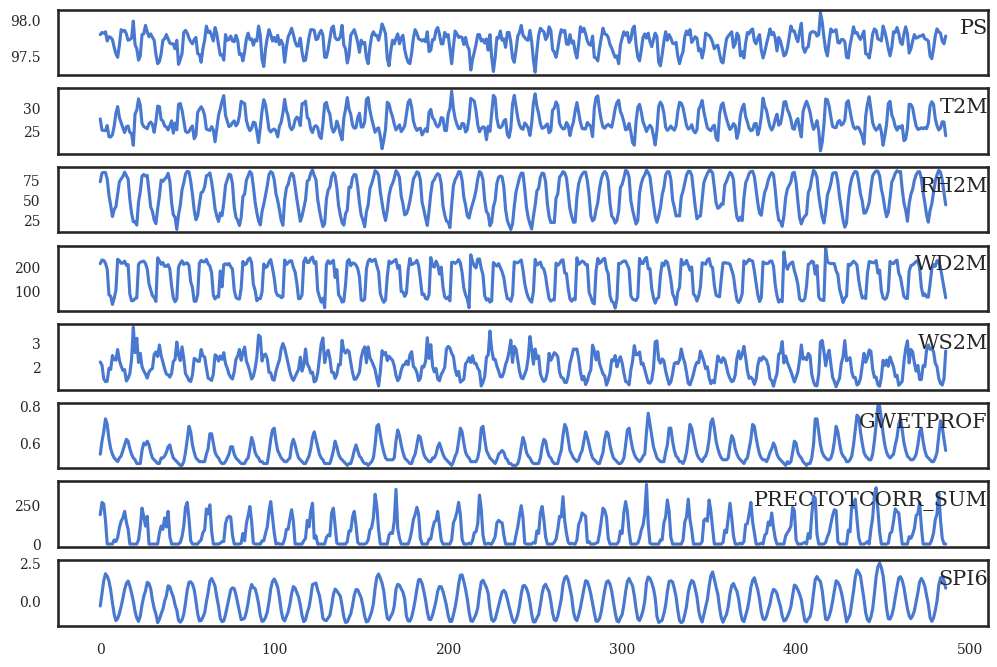

In [15]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize=(12,8))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(data.values[:, group])
 plt.title(data.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

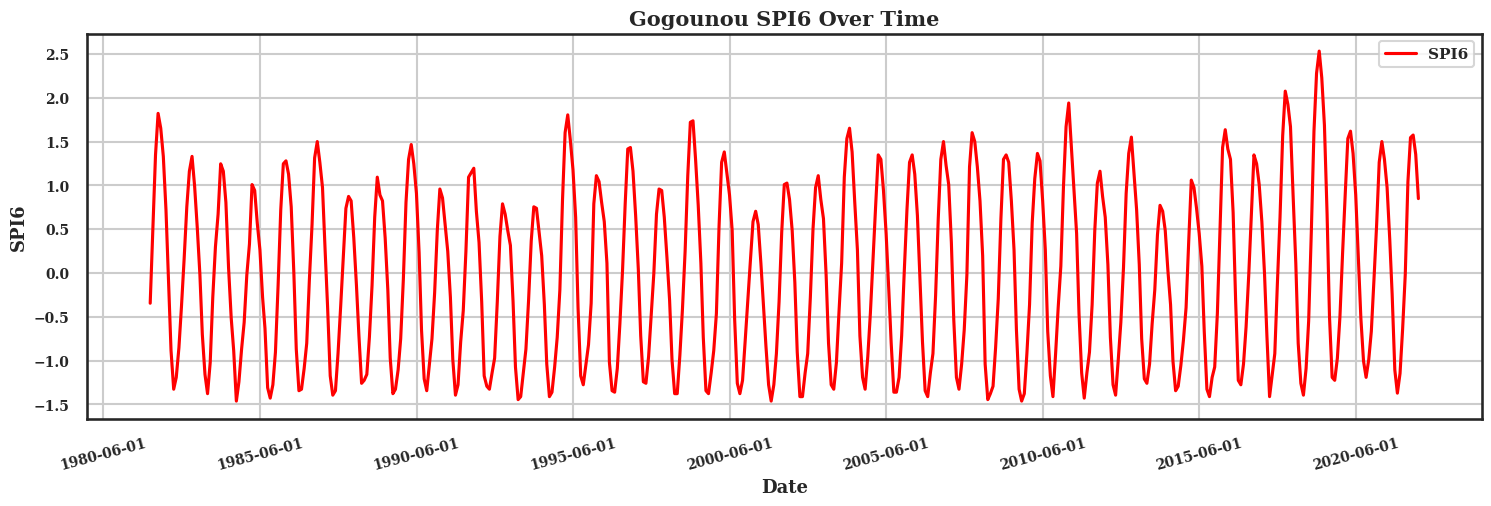

In [16]:
import matplotlib.dates as mdates

# Plot SPI6 in function of Date
plt.figure(figsize=(18, 5))
plt.plot(data.index, data['SPI6'], label='SPI6', color='red')

# Adding grid
plt.grid(True)

# Adding Title
plt.title(data_params['city'] + ' SPI6 Over Time', fontweight='bold')

# Annotating x and y axis
plt.xlabel('Date', fontweight='bold')
plt.ylabel('SPI6', fontweight='bold')

# Rotate dates on x-axis and bold the ticks
plt.xticks(rotation=15, fontweight='bold')
plt.yticks(fontweight='bold')

# Adding legend with bold font
plt.legend(prop={'weight': 'bold'}, fontsize='large')

# Set the major locator for x-axis to show every 5th year in June
five_years = mdates.YearLocator(5)  # every 5 years
june_locator = mdates.MonthLocator(6)  # Add ticks only for June
plt.gca().xaxis.set_major_locator(five_years)
plt.gca().xaxis.set_minor_locator(june_locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust the format to only show June 1st for every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-06-01'))

# Saving the figure before showing
plt.savefig(data_params['save_path'] + data_params['city'] + '/spi6_plot.png')

# Show the plot
plt.show()


#### Normalization
 The scale of the features are big comparatively to the target SPI6. Let's normalize those features 

In [17]:
target_column = 'SPI6'

In [18]:
feature_range = (-1, 1)

# Separate the target column from the other columns
features = data.drop(columns=[target_column])
target = data[target_column]

# Initialize and fit scaler on train data if needed
scaler_type = data_params['scaling_type']
if scaler_type == 'minmax':
    scaler = MinMaxScaler(feature_range=feature_range)
elif scaler_type == 'standard':
    scaler = StandardScaler()
elif scaler_type == 'none':
    scaler = None
else:
    raise ValueError(f"Unsupported scaler_type: {scaler_type}")

normalized_features = scaler.fit_transform(features)

# Convert the normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns, index=data.index)

# Reconstruct the DataFrame with the normalized columns and the target column
normalized_data = pd.concat([normalized_features_df, target], axis=1)

# Display the head of the new DataFrame
normalized_data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,,
1981-06-30,0.261905,0.070661,0.603024,0.493704,-0.169355,-0.6250,-0.013716,-0.344705
1981-07-31,0.333333,-0.307220,0.896907,0.614564,-0.274194,-0.1875,0.397288,0.518499
1981-08-31,0.309524,-0.314900,0.915876,0.599968,-0.733871,0.1250,0.342477,1.347842
1981-09-30,0.357143,-0.322581,0.912302,0.504772,-0.830645,0.5625,-0.205476,1.821761
1981-10-31,0.047619,-0.150538,0.695945,0.308766,-0.814516,0.3750,-1.000000,1.652523


### Pearson Correlation

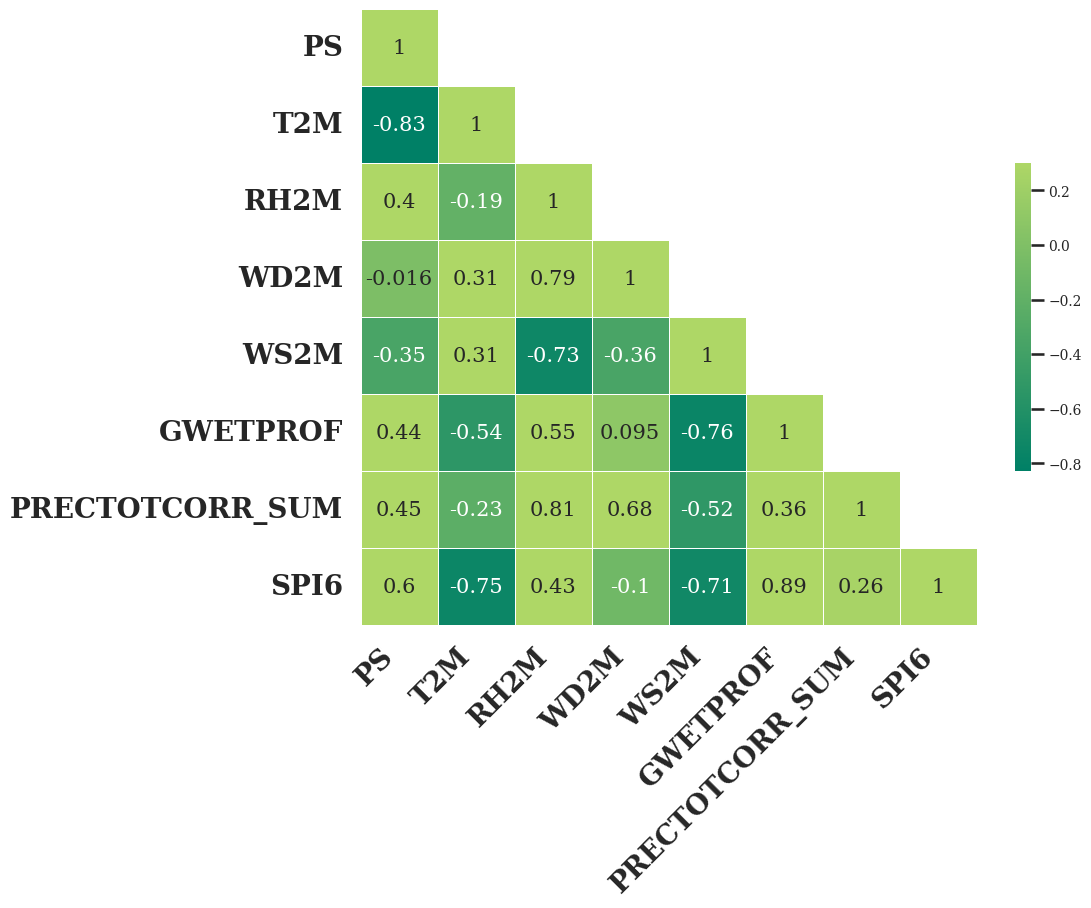

In [19]:
# Compute the correlation matrix
corr = normalized_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = 'summer'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":15})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20, fontweight='bold')
plt.savefig('heatmap correlation Pix1')

#### Let's focus on the corelations between each variable and target variable

In [20]:
correlations_data = normalized_data.corr()[target_column].sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.893671
PS                 0.599878
RH2M               0.430562
PRECTOTCORR_SUM    0.257885
WD2M              -0.101641
WS2M              -0.711812
T2M               -0.749674
Name: SPI6, dtype: float64

In [21]:
correlations_data = np.abs(normalized_data.corr()[target_column]).sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.893671
T2M                0.749674
WS2M               0.711812
PS                 0.599878
RH2M               0.430562
PRECTOTCORR_SUM    0.257885
WD2M               0.101641
Name: SPI6, dtype: float64

normalized_data = normalized_data.drop(columns=['WD2M'])
normalized_data.head()

No need of WD2M covariate removal compared to the previous dataset

In [22]:
no_lagged_data_path = data_params['data_path'] + 'no_lagged/' + data_params['city'] + '_no_lagged.csv'
normalized_data.to_csv(no_lagged_data_path)

### Transform dataset for Time series forecasting

In [23]:
import sys
sys.path.append('../')

from models.utils import create_lagged_features

2025-08-04 22:28:30.795761: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-04 22:28:30.816995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-04 22:28:30.855772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-04 22:28:30.855889: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-04 22:28:30.884504: I tensorflow/core/platform/cpu_feature_gua

In [24]:
col_names = list(normalized_data.columns)
print(col_names)

['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6']


In [25]:
lagged_selected_columns = ['SPI6(t)']

In [26]:
lagged_data = create_lagged_features(data= normalized_data, 
                                      col_names=col_names,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data.head()

,PS(t-5),T2M(t-5),RH2M(t-5),WD2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),...,PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WD2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,0.261905,0.070661,0.603024,0.493704,-0.169355,-0.6250,-0.013716,-0.344705,0.333333,-0.307220,...,-1.000000,1.652523,0.190476,-0.528418,0.152715,-0.551367,-0.379032,-0.1250,-1.000000,1.330927
1981-12-31,0.333333,-0.307220,0.896907,0.614564,-0.274194,-0.1875,0.397288,0.518499,0.309524,-0.314900,...,-1.000000,1.330927,0.166667,-0.534562,-0.192577,-0.602534,-0.419355,-0.4375,-1.000000,0.721630
1982-01-31,0.309524,-0.314900,0.915876,0.599968,-0.733871,0.1250,0.342477,1.347842,0.357143,-0.322581,...,-1.000000,0.721630,0.095238,-0.462366,-0.567010,-0.876173,0.048387,-0.6250,-1.000000,-0.141574
1982-02-28,0.357143,-0.322581,0.912302,0.504772,-0.830645,0.5625,-0.205476,1.821761,0.047619,-0.150538,...,-1.000000,-0.141574,-0.166667,-0.175115,-0.328385,-0.674152,-0.088710,-0.7500,-0.862999,-0.886282
1982-03-31,0.047619,-0.150538,0.695945,0.308766,-0.814516,0.3750,-1.000000,1.652523,0.190476,-0.528418,...,-0.862999,-0.886282,-0.380952,0.262673,-0.235464,-0.398989,-0.104839,-0.8125,-0.917810,-1.326341


### Now we have 48 columns. Lets reduce them

### Select the most useful lags. 

Let's plot correlation matrice by including for each the target TWS and others with a  given lag_lenth

In [27]:
normalized_data.columns

Index(['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM',
       'SPI6'],
      dtype='object')

In [28]:
lagged_data.columns

Index(['PS(t-5)', 'T2M(t-5)', 'RH2M(t-5)', 'WD2M(t-5)', 'WS2M(t-5)',
       'GWETPROF(t-5)', 'PRECTOTCORR_SUM(t-5)', 'SPI6(t-5)', 'PS(t-4)',
       'T2M(t-4)', 'RH2M(t-4)', 'WD2M(t-4)', 'WS2M(t-4)', 'GWETPROF(t-4)',
       'PRECTOTCORR_SUM(t-4)', 'SPI6(t-4)', 'PS(t-3)', 'T2M(t-3)', 'RH2M(t-3)',
       'WD2M(t-3)', 'WS2M(t-3)', 'GWETPROF(t-3)', 'PRECTOTCORR_SUM(t-3)',
       'SPI6(t-3)', 'PS(t-2)', 'T2M(t-2)', 'RH2M(t-2)', 'WD2M(t-2)',
       'WS2M(t-2)', 'GWETPROF(t-2)', 'PRECTOTCORR_SUM(t-2)', 'SPI6(t-2)',
       'PS(t-1)', 'T2M(t-1)', 'RH2M(t-1)', 'WD2M(t-1)', 'WS2M(t-1)',
       'GWETPROF(t-1)', 'PRECTOTCORR_SUM(t-1)', 'SPI6(t-1)', 'PS(t)', 'T2M(t)',
       'RH2M(t)', 'WD2M(t)', 'WS2M(t)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t)',
       'SPI6(t)'],
      dtype='object')

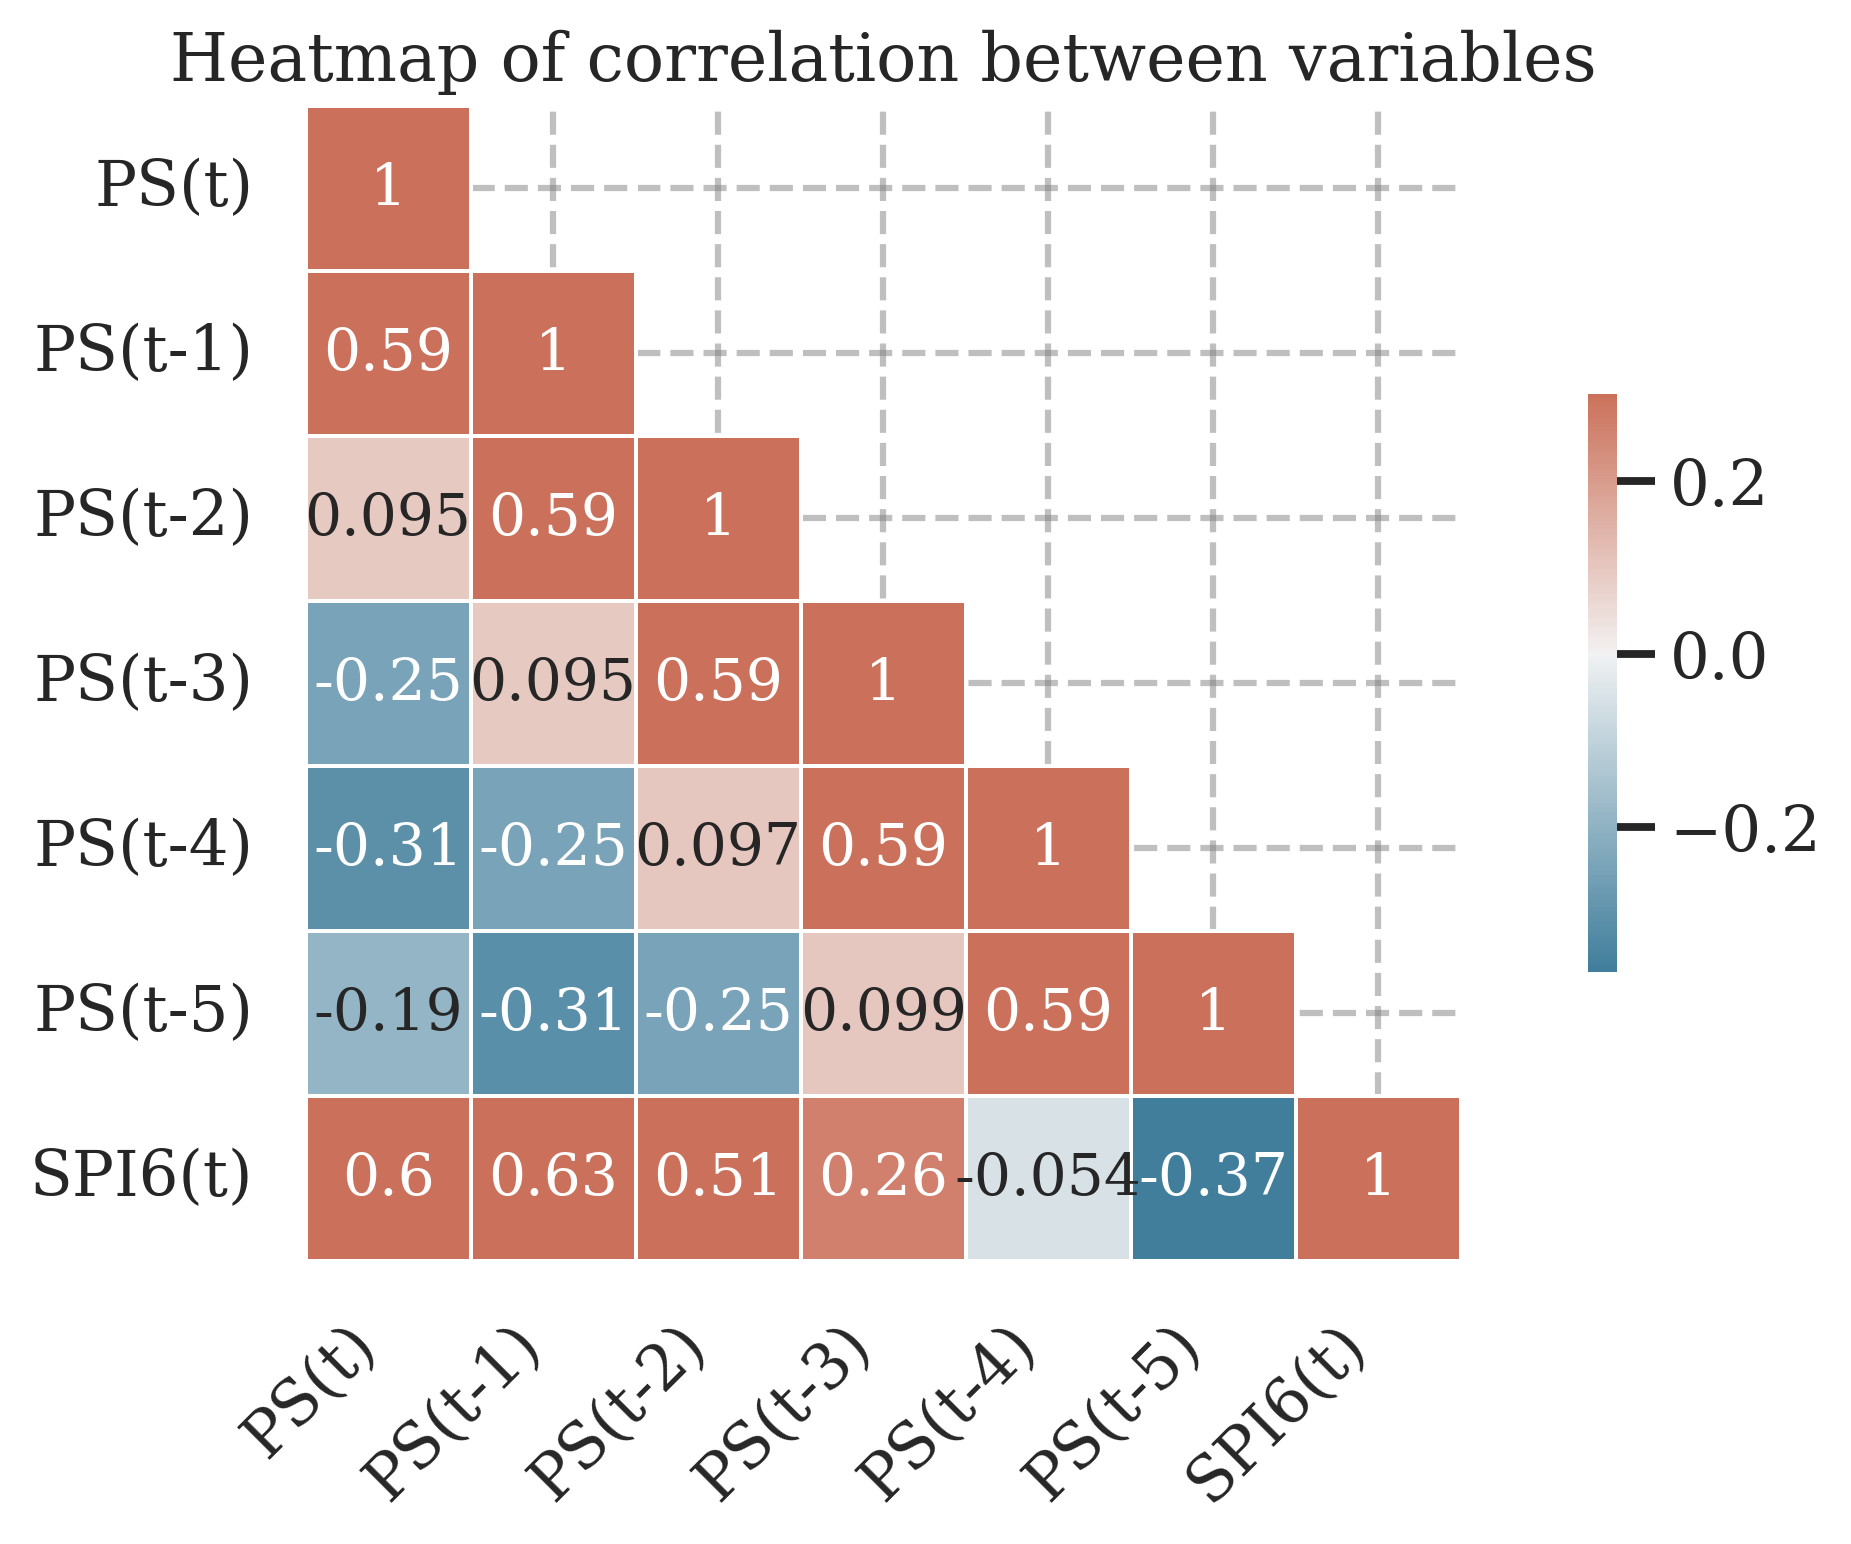

In [29]:
# Compute the correlation matrix : SPI6 and lag PS 

dfm1 = lagged_data[['PS(t)','PS(t-1)', 'PS(t-2)', 'PS(t-3)','PS(t-4)', 'PS(t-5)','SPI6(t)']]

corr = dfm1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [30]:
np.abs(dfm1.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)    1.000000
PS(t-1)    0.626711
PS(t)      0.600117
PS(t-2)    0.505915
PS(t-5)    0.367648
PS(t-3)    0.264600
PS(t-4)    0.053937
Name: SPI6(t), dtype: float64

#####  The lag 1 : PS(t-1) is the most correlated. So, we only keep it.

In [31]:
lagged_selected_columns.append('PS(t-1)')

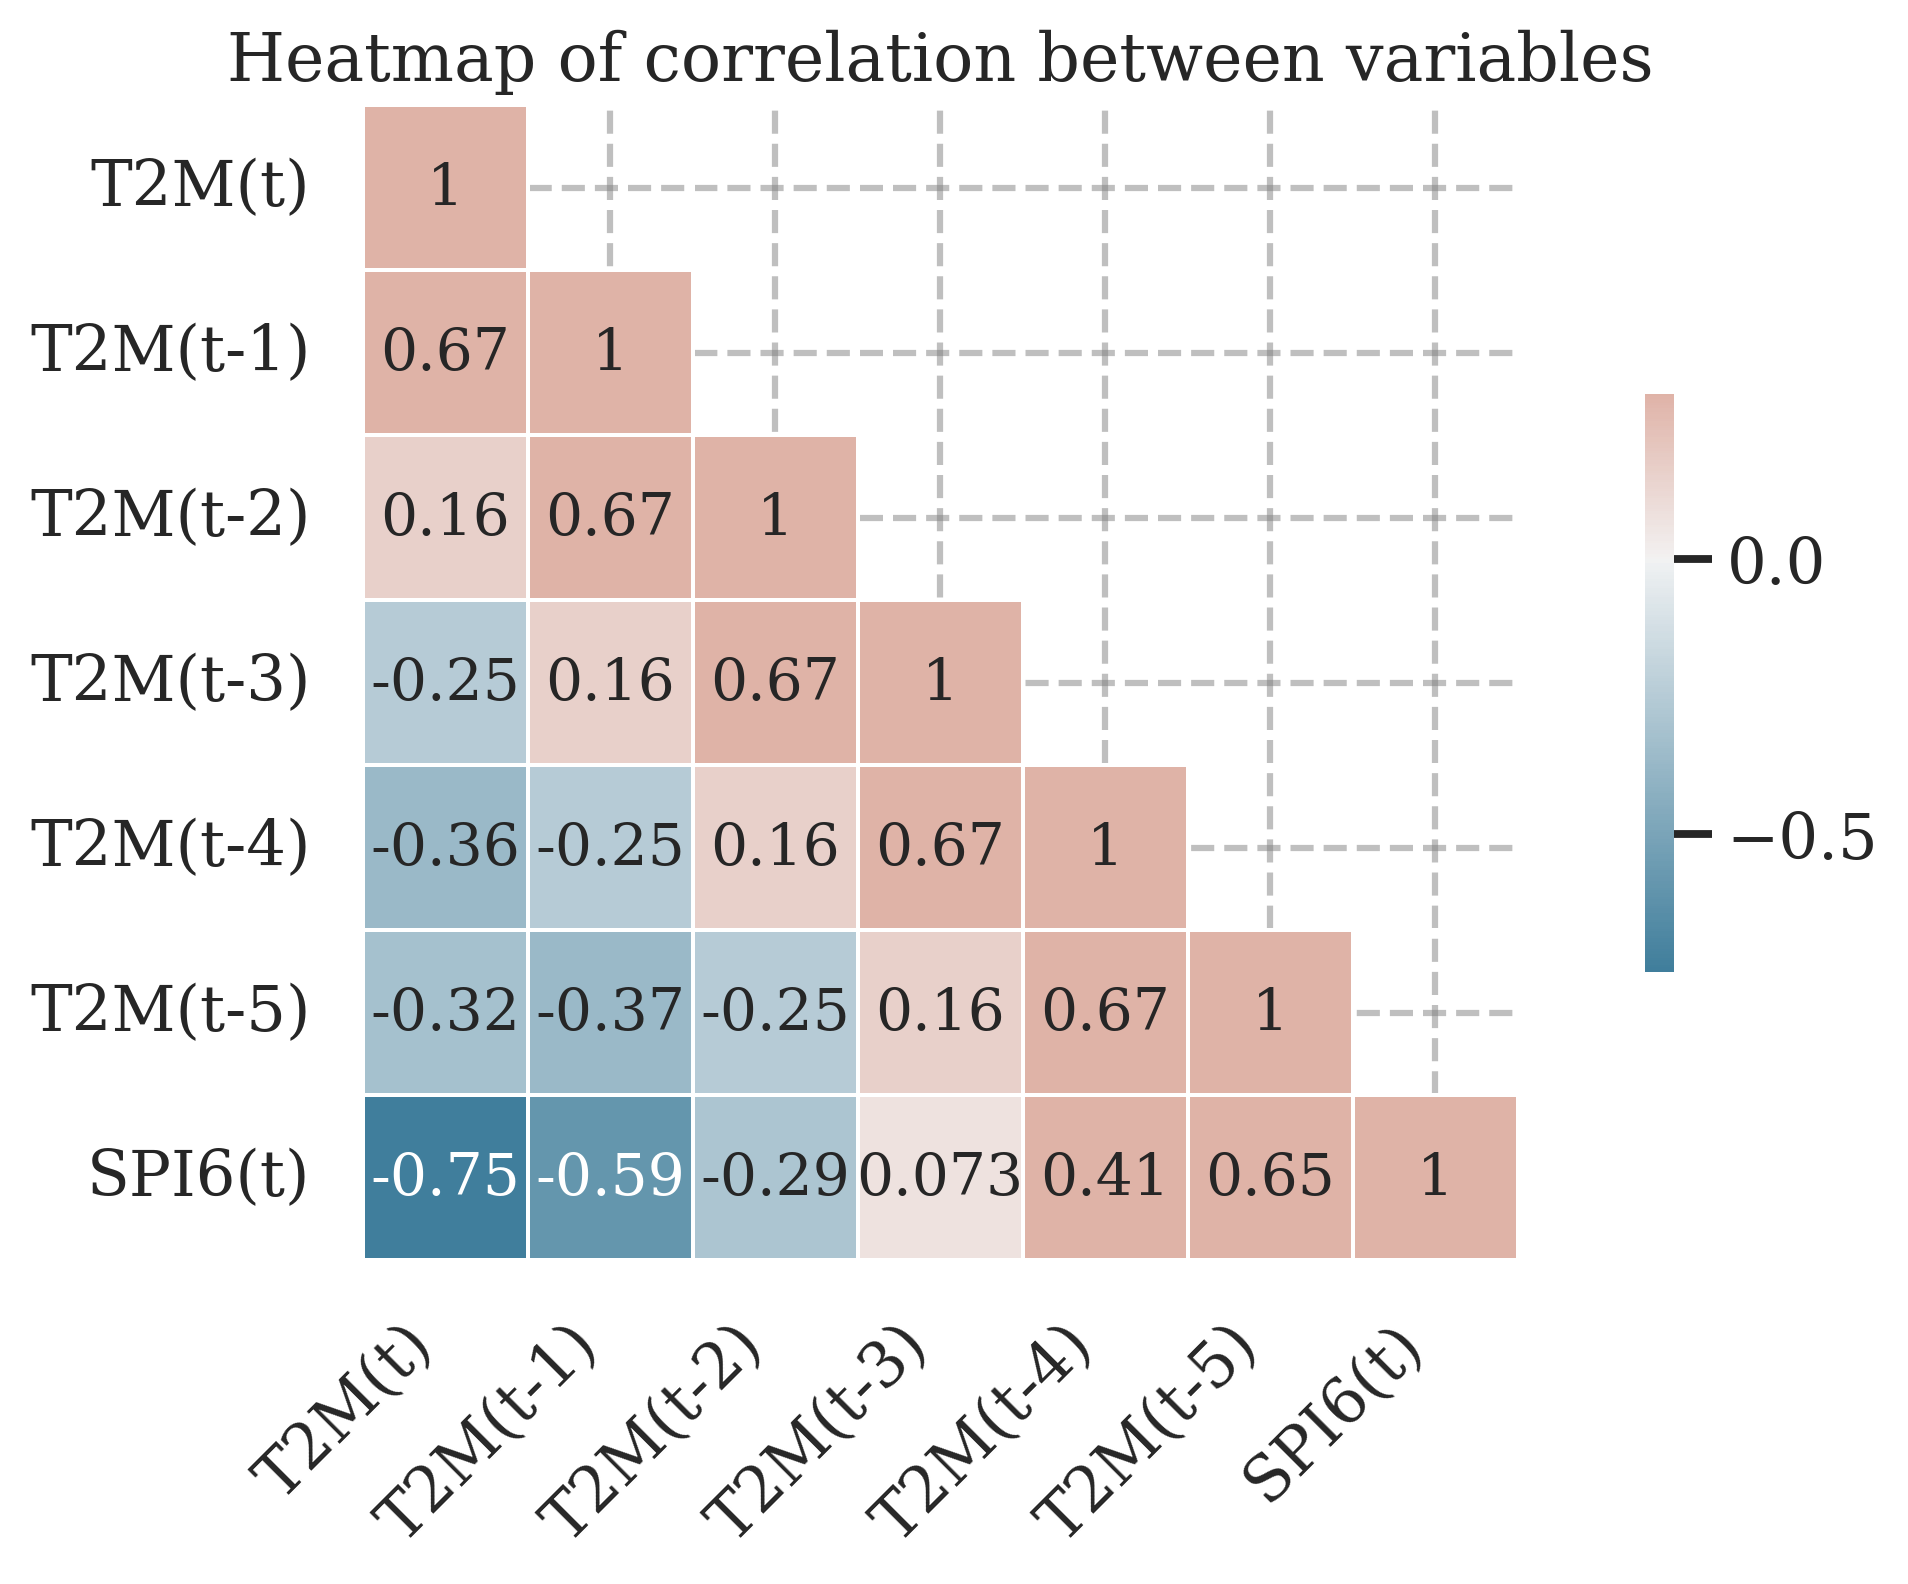

In [32]:
# Compute the correlation matrix : SPI6 and lag T2M

dfm2 = lagged_data[['T2M(t)','T2M(t-1)', 'T2M(t-2)', 'T2M(t-3)','T2M(t-4)', 'T2M(t-5)','SPI6(t)']]

corr = dfm2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [33]:
np.abs(dfm2.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)     1.000000
T2M(t)      0.750064
T2M(t-5)    0.650594
T2M(t-1)    0.592425
T2M(t-4)    0.408421
T2M(t-2)    0.288631
T2M(t-3)    0.073116
Name: SPI6(t), dtype: float64

#### le lag 0 T2M(t) est le plus correlé avec 0.75

In [34]:
print(lagged_selected_columns), lagged_selected_columns.append('T2M(t)')

['SPI6(t)', 'PS(t-1)']


(None, None)

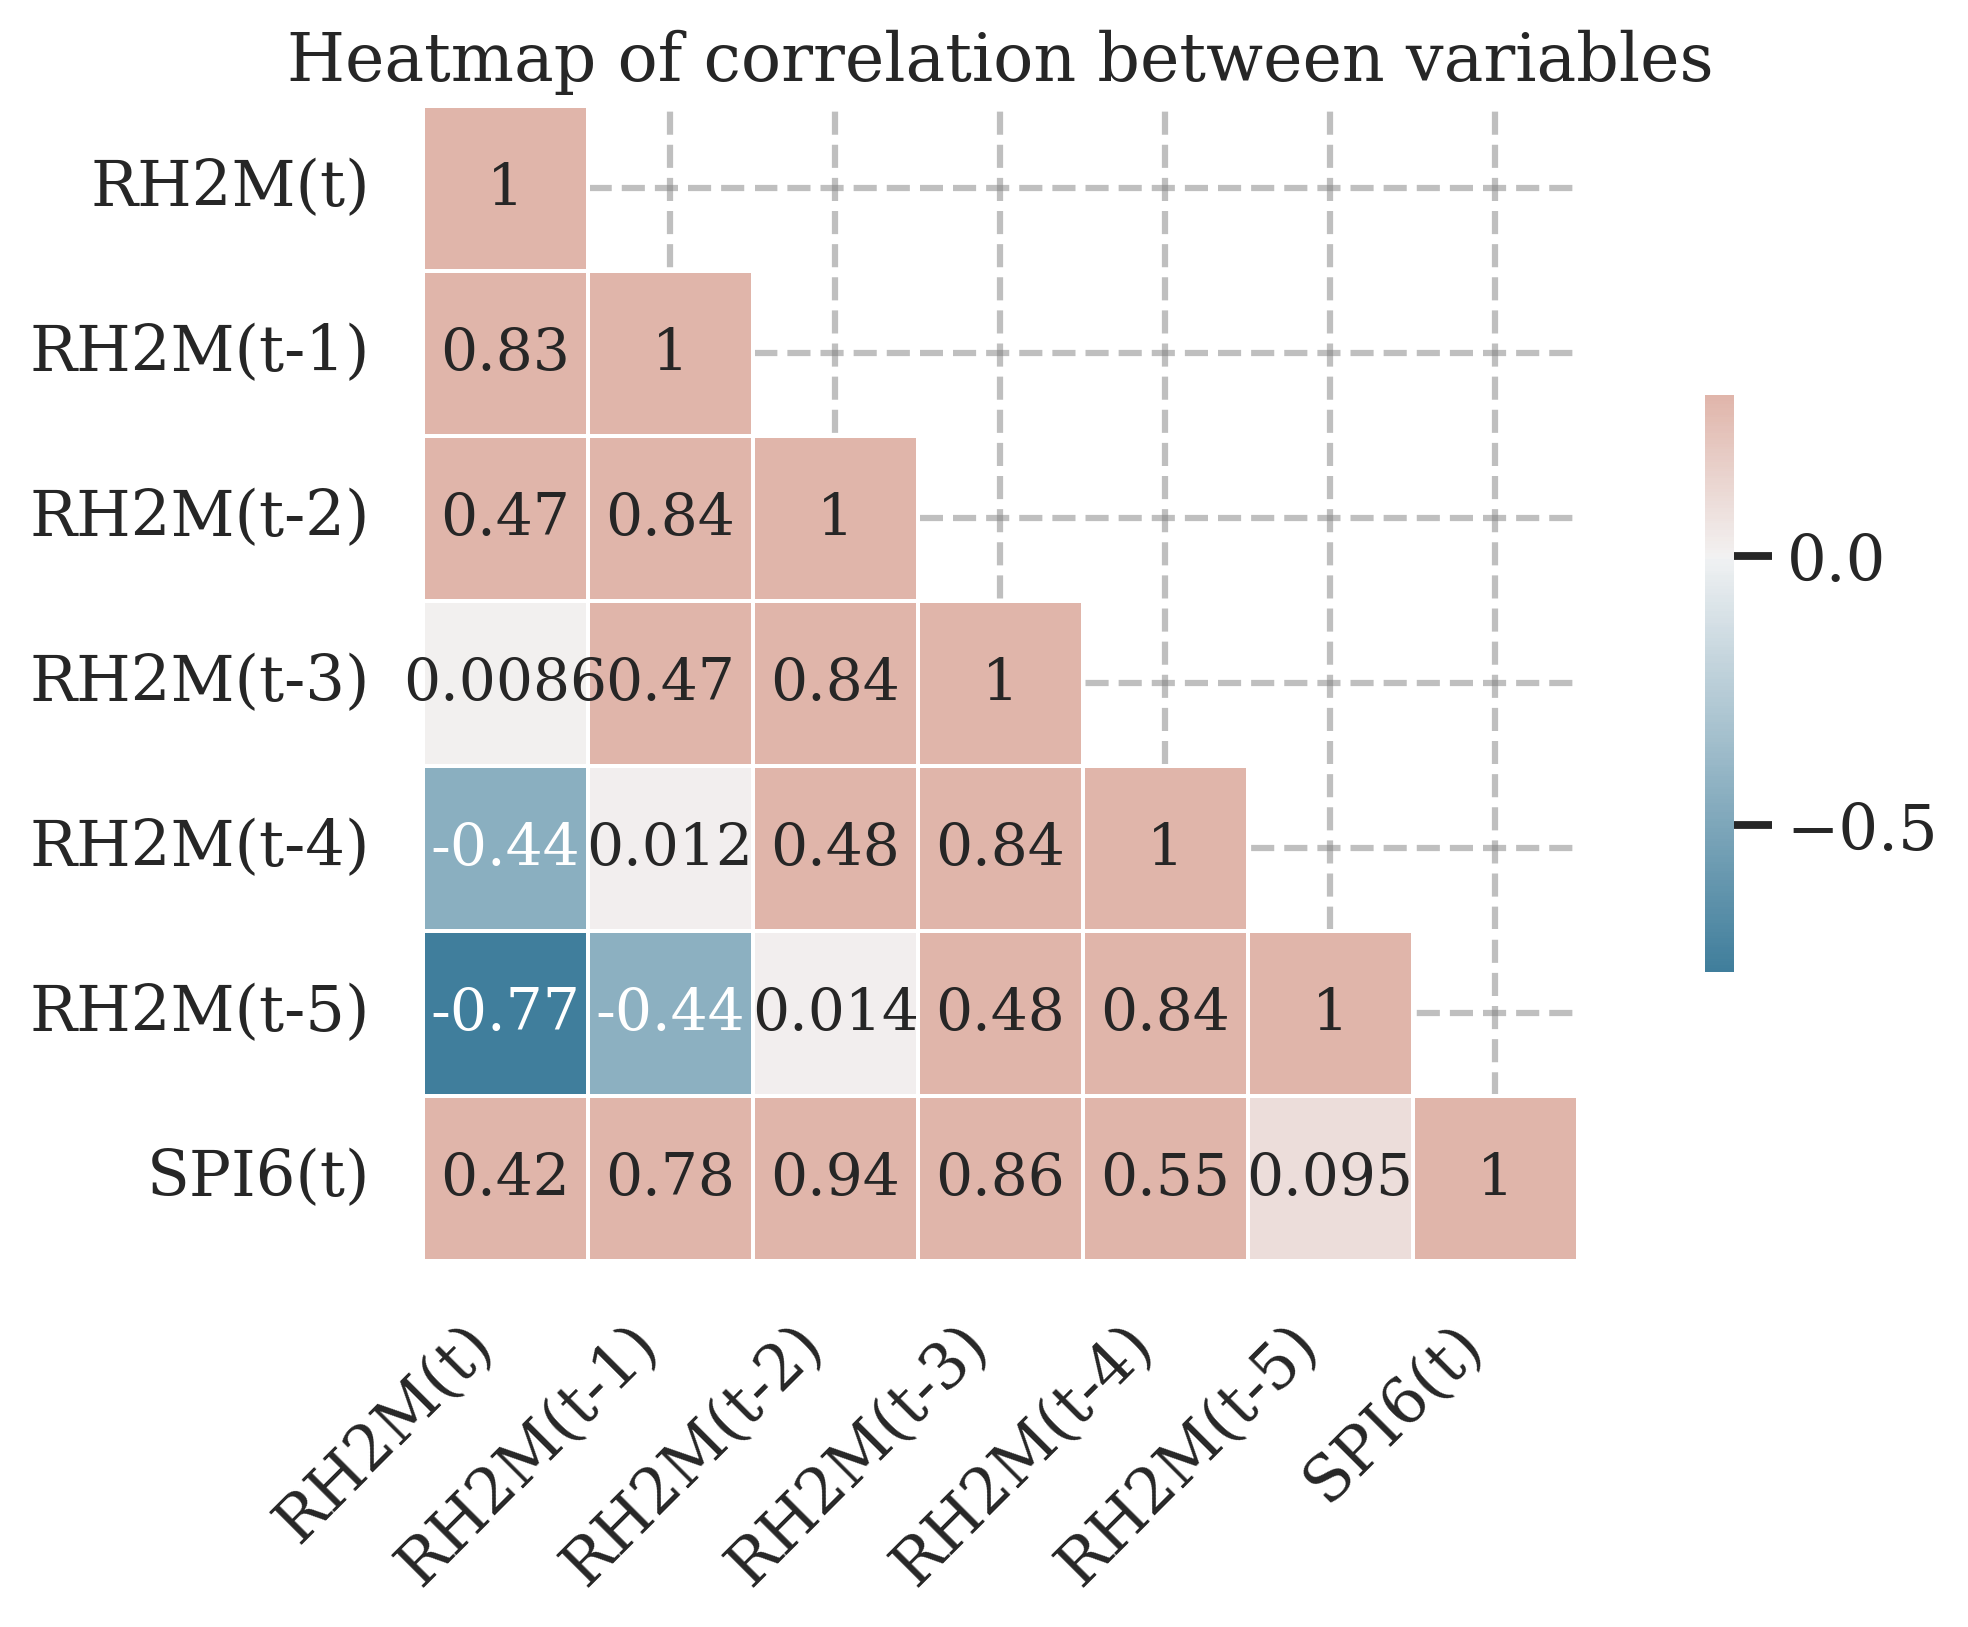

In [35]:
# Compute the correlation matrix : SPI6 and lag RH2M

dfm3 = lagged_data[['RH2M(t)','RH2M(t-1)', 'RH2M(t-2)', 'RH2M(t-3)','RH2M(t-4)', 'RH2M(t-5)','SPI6(t)']]

corr = dfm3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [36]:
np.abs(dfm3.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
RH2M(t-2)    0.939124
RH2M(t-3)    0.855721
RH2M(t-1)    0.784255
RH2M(t-4)    0.549900
RH2M(t)      0.424884
RH2M(t-5)    0.094875
Name: SPI6(t), dtype: float64

le lag 2 RH2M(t-2) est le plus correlé avec un coefficient de     0.93

In [37]:
lagged_selected_columns.append('RH2M(t-2)')

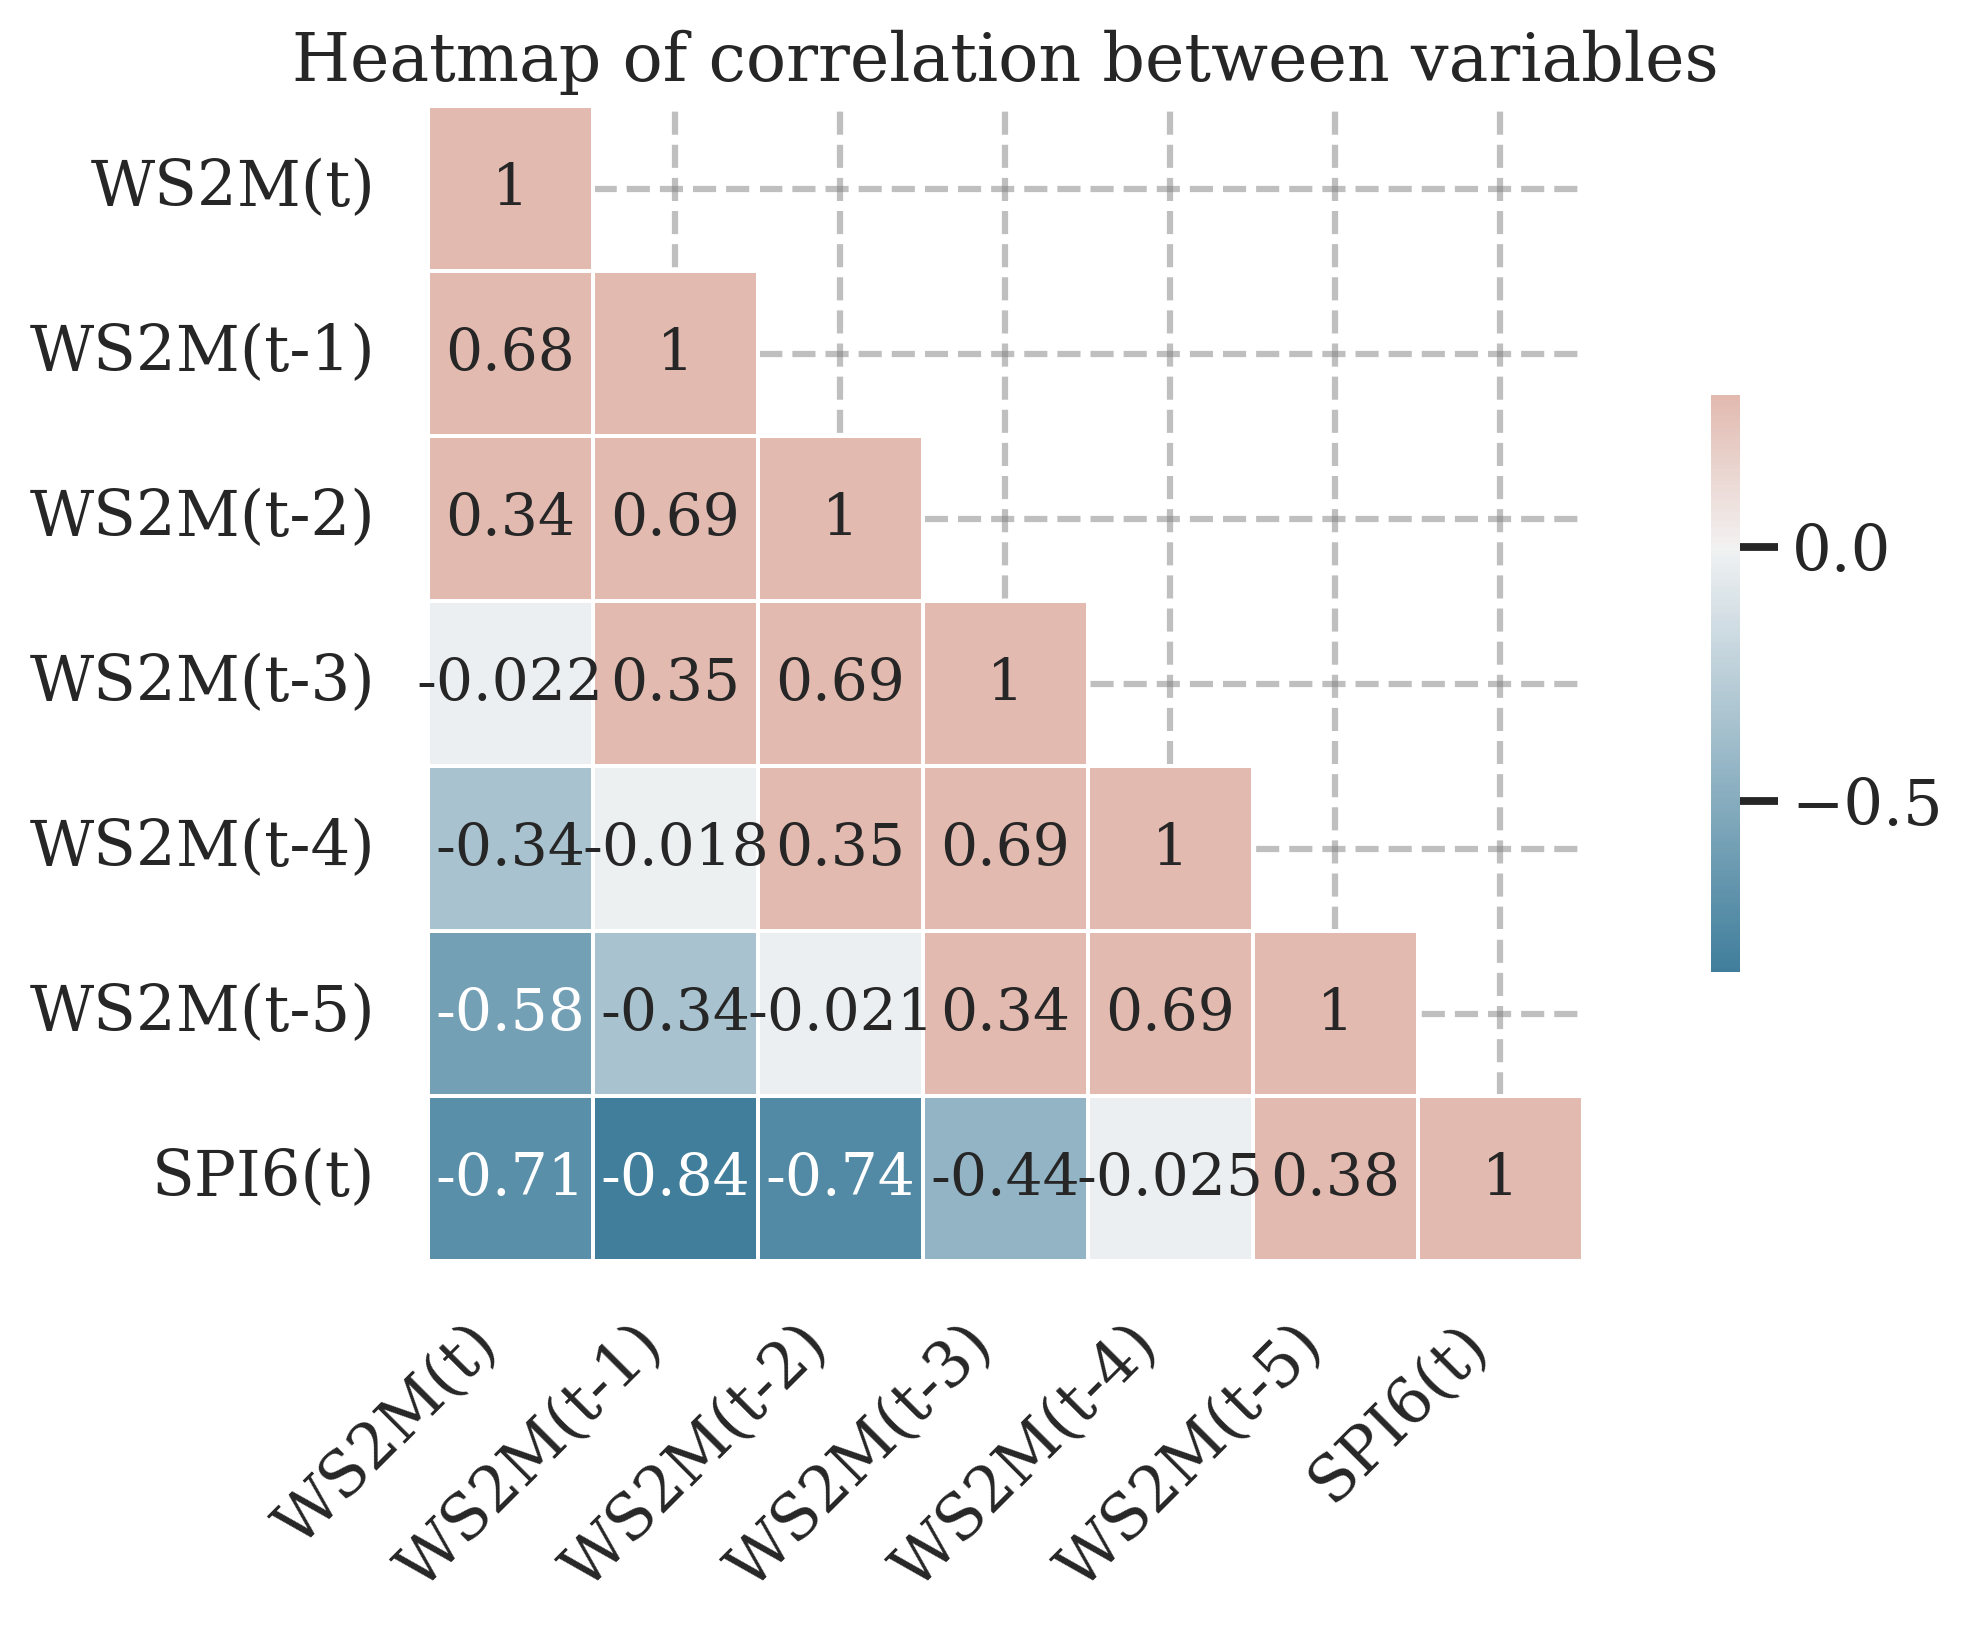

In [38]:
# Compute the correlation matrix : SPI6 and lag WS2M

dfm4 = lagged_data[['WS2M(t)','WS2M(t-1)', 'WS2M(t-2)', 'WS2M(t-3)','WS2M(t-4)', 'WS2M(t-5)','SPI6(t)']]

corr = dfm4.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [39]:
np.abs(dfm4.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WS2M(t-1)    0.836822
WS2M(t-2)    0.743673
WS2M(t)      0.708426
WS2M(t-3)    0.444329
WS2M(t-5)    0.379261
WS2M(t-4)    0.024886
Name: SPI6(t), dtype: float64

le lag 1 WS2M(t-1)  est le plus correlé avec SPI6(t)  : 0.83

In [40]:
lagged_selected_columns.append('WS2M(t-1)')

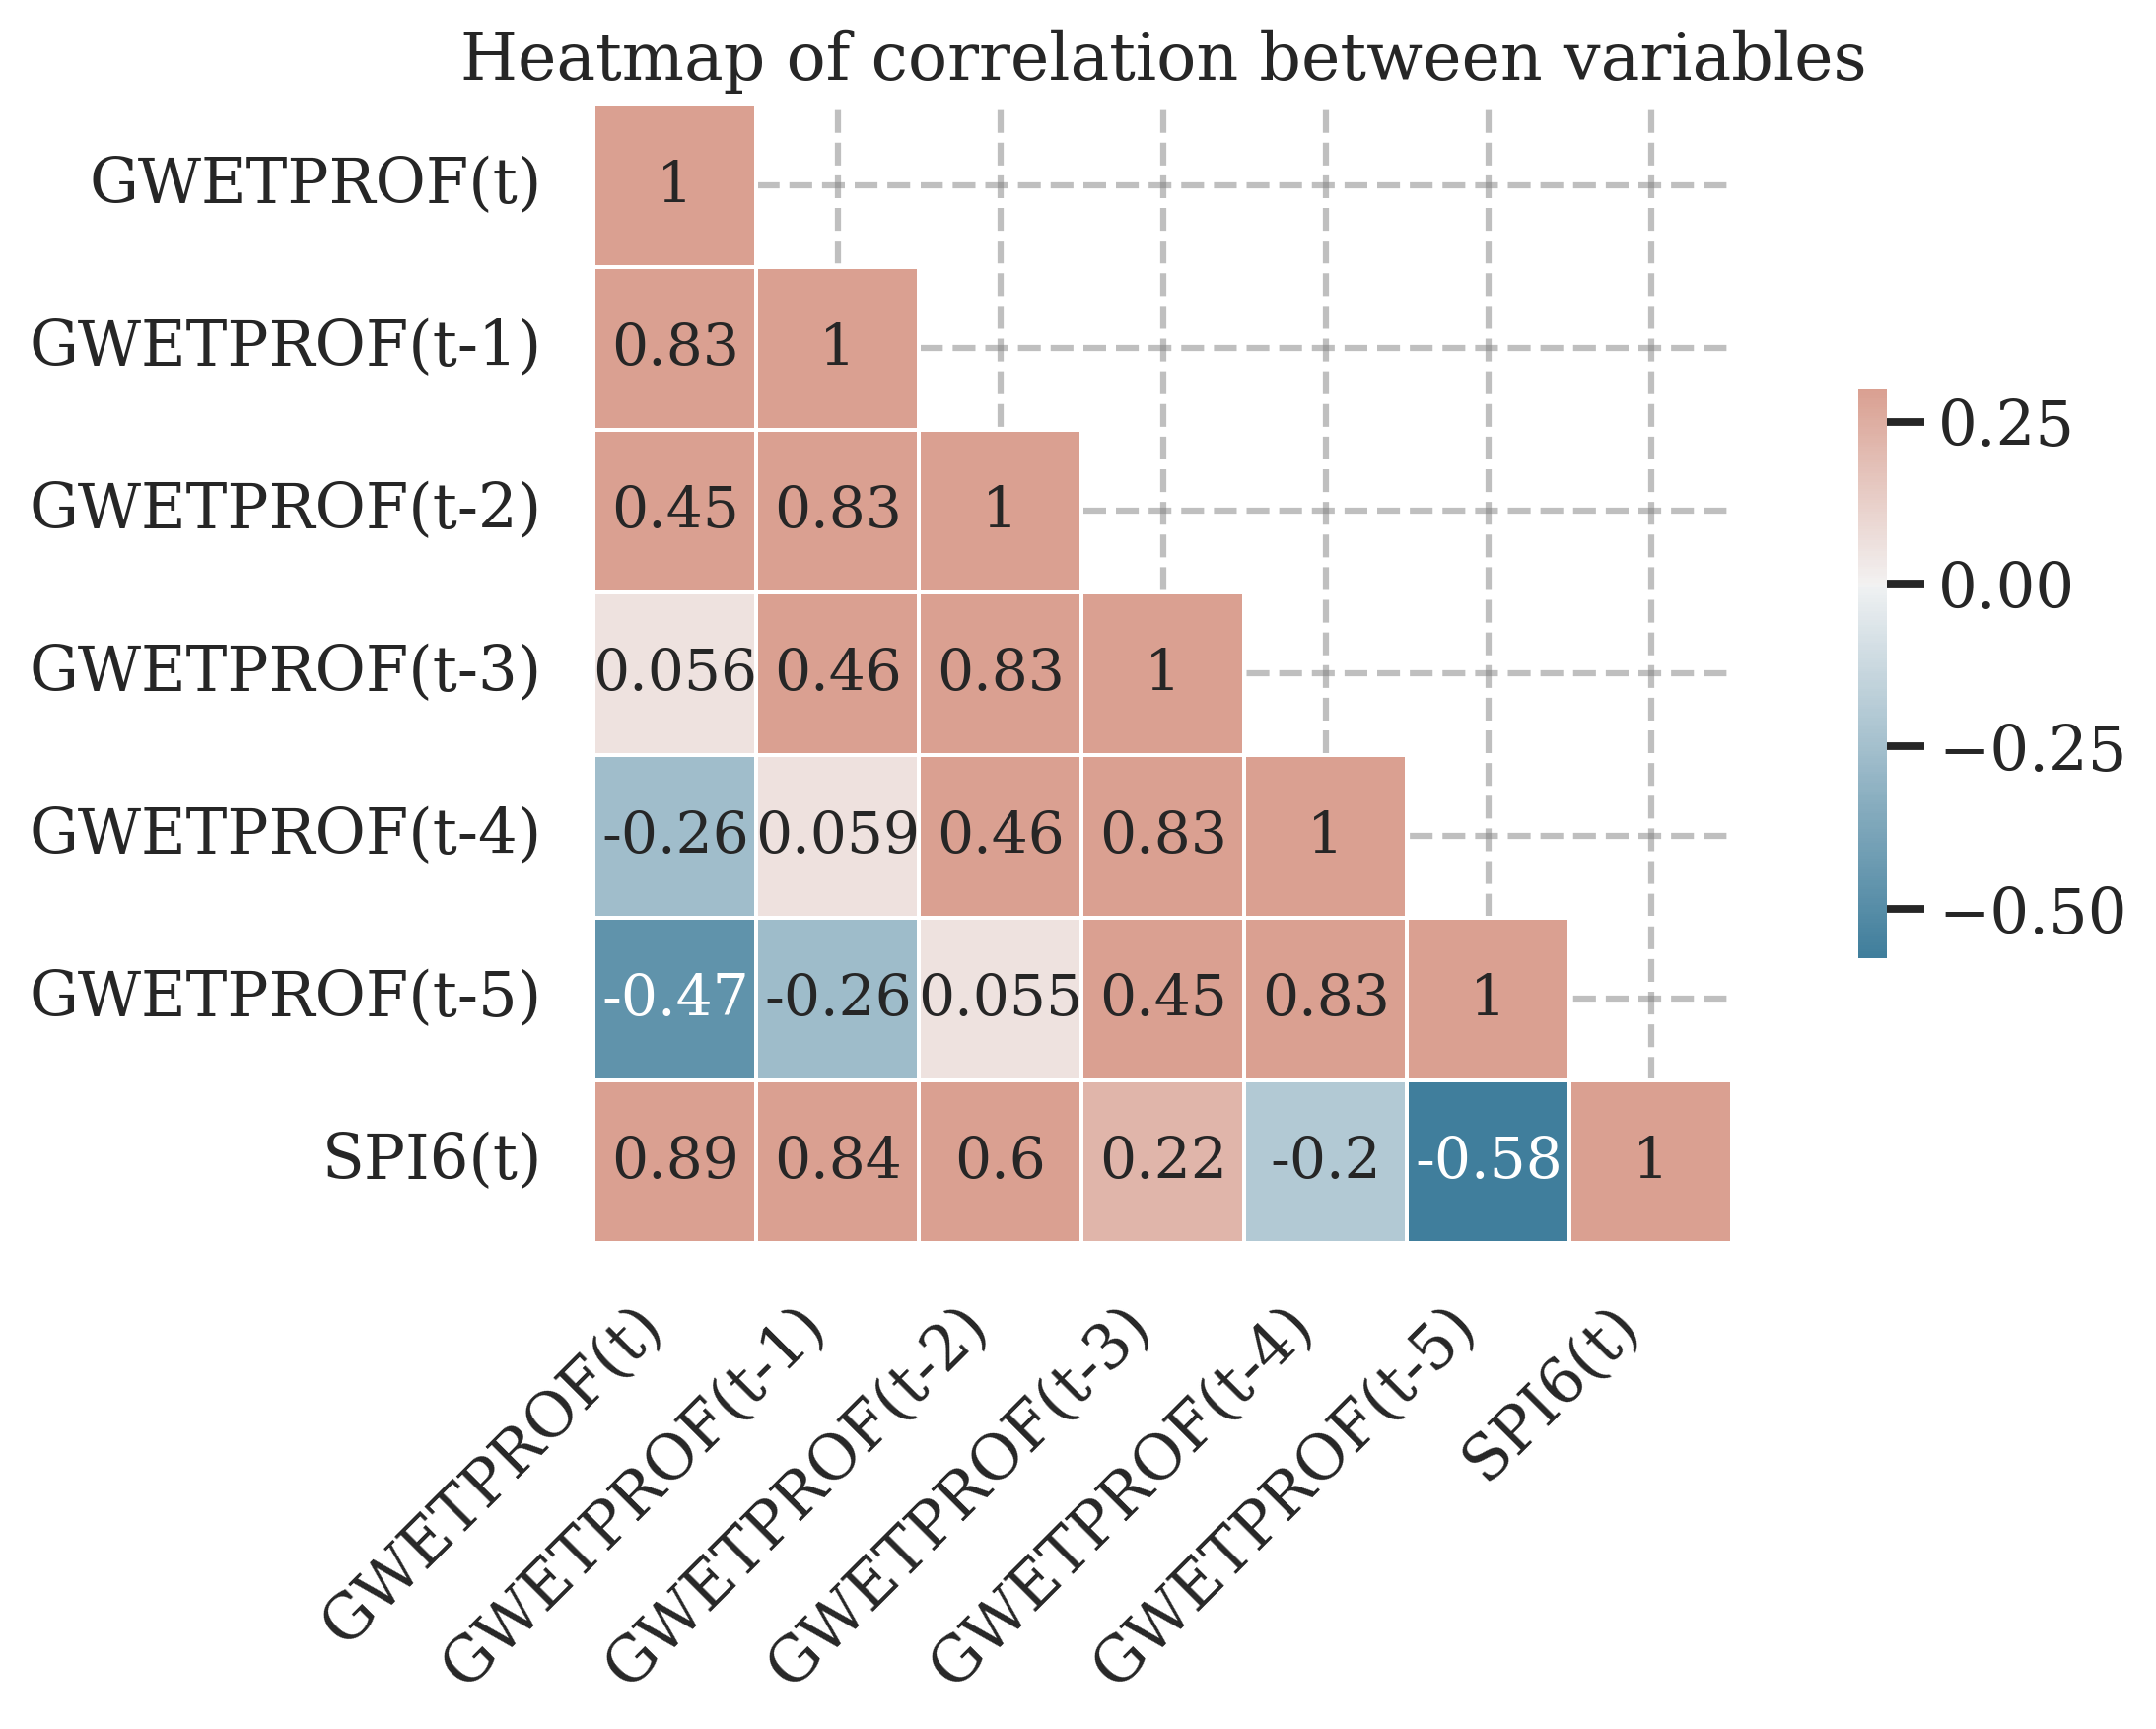

In [41]:
# Compute the correlation matrix : SPI6 and lag GWETPROF

dfm5 = lagged_data[['GWETPROF(t)','GWETPROF(t-1)', 'GWETPROF(t-2)', 'GWETPROF(t-3)','GWETPROF(t-4)', 'GWETPROF(t-5)','SPI6(t)']]

corr = dfm5.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [42]:
np.abs(dfm5.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)          1.000000
GWETPROF(t)      0.892391
GWETPROF(t-1)    0.841921
GWETPROF(t-2)    0.597262
GWETPROF(t-5)    0.575813
GWETPROF(t-3)    0.224043
GWETPROF(t-4)    0.204030
Name: SPI6(t), dtype: float64

le lag 0 est le plus correlé : GWETPROF(t)      0.89

In [43]:
lagged_selected_columns.append('GWETPROF(t)')

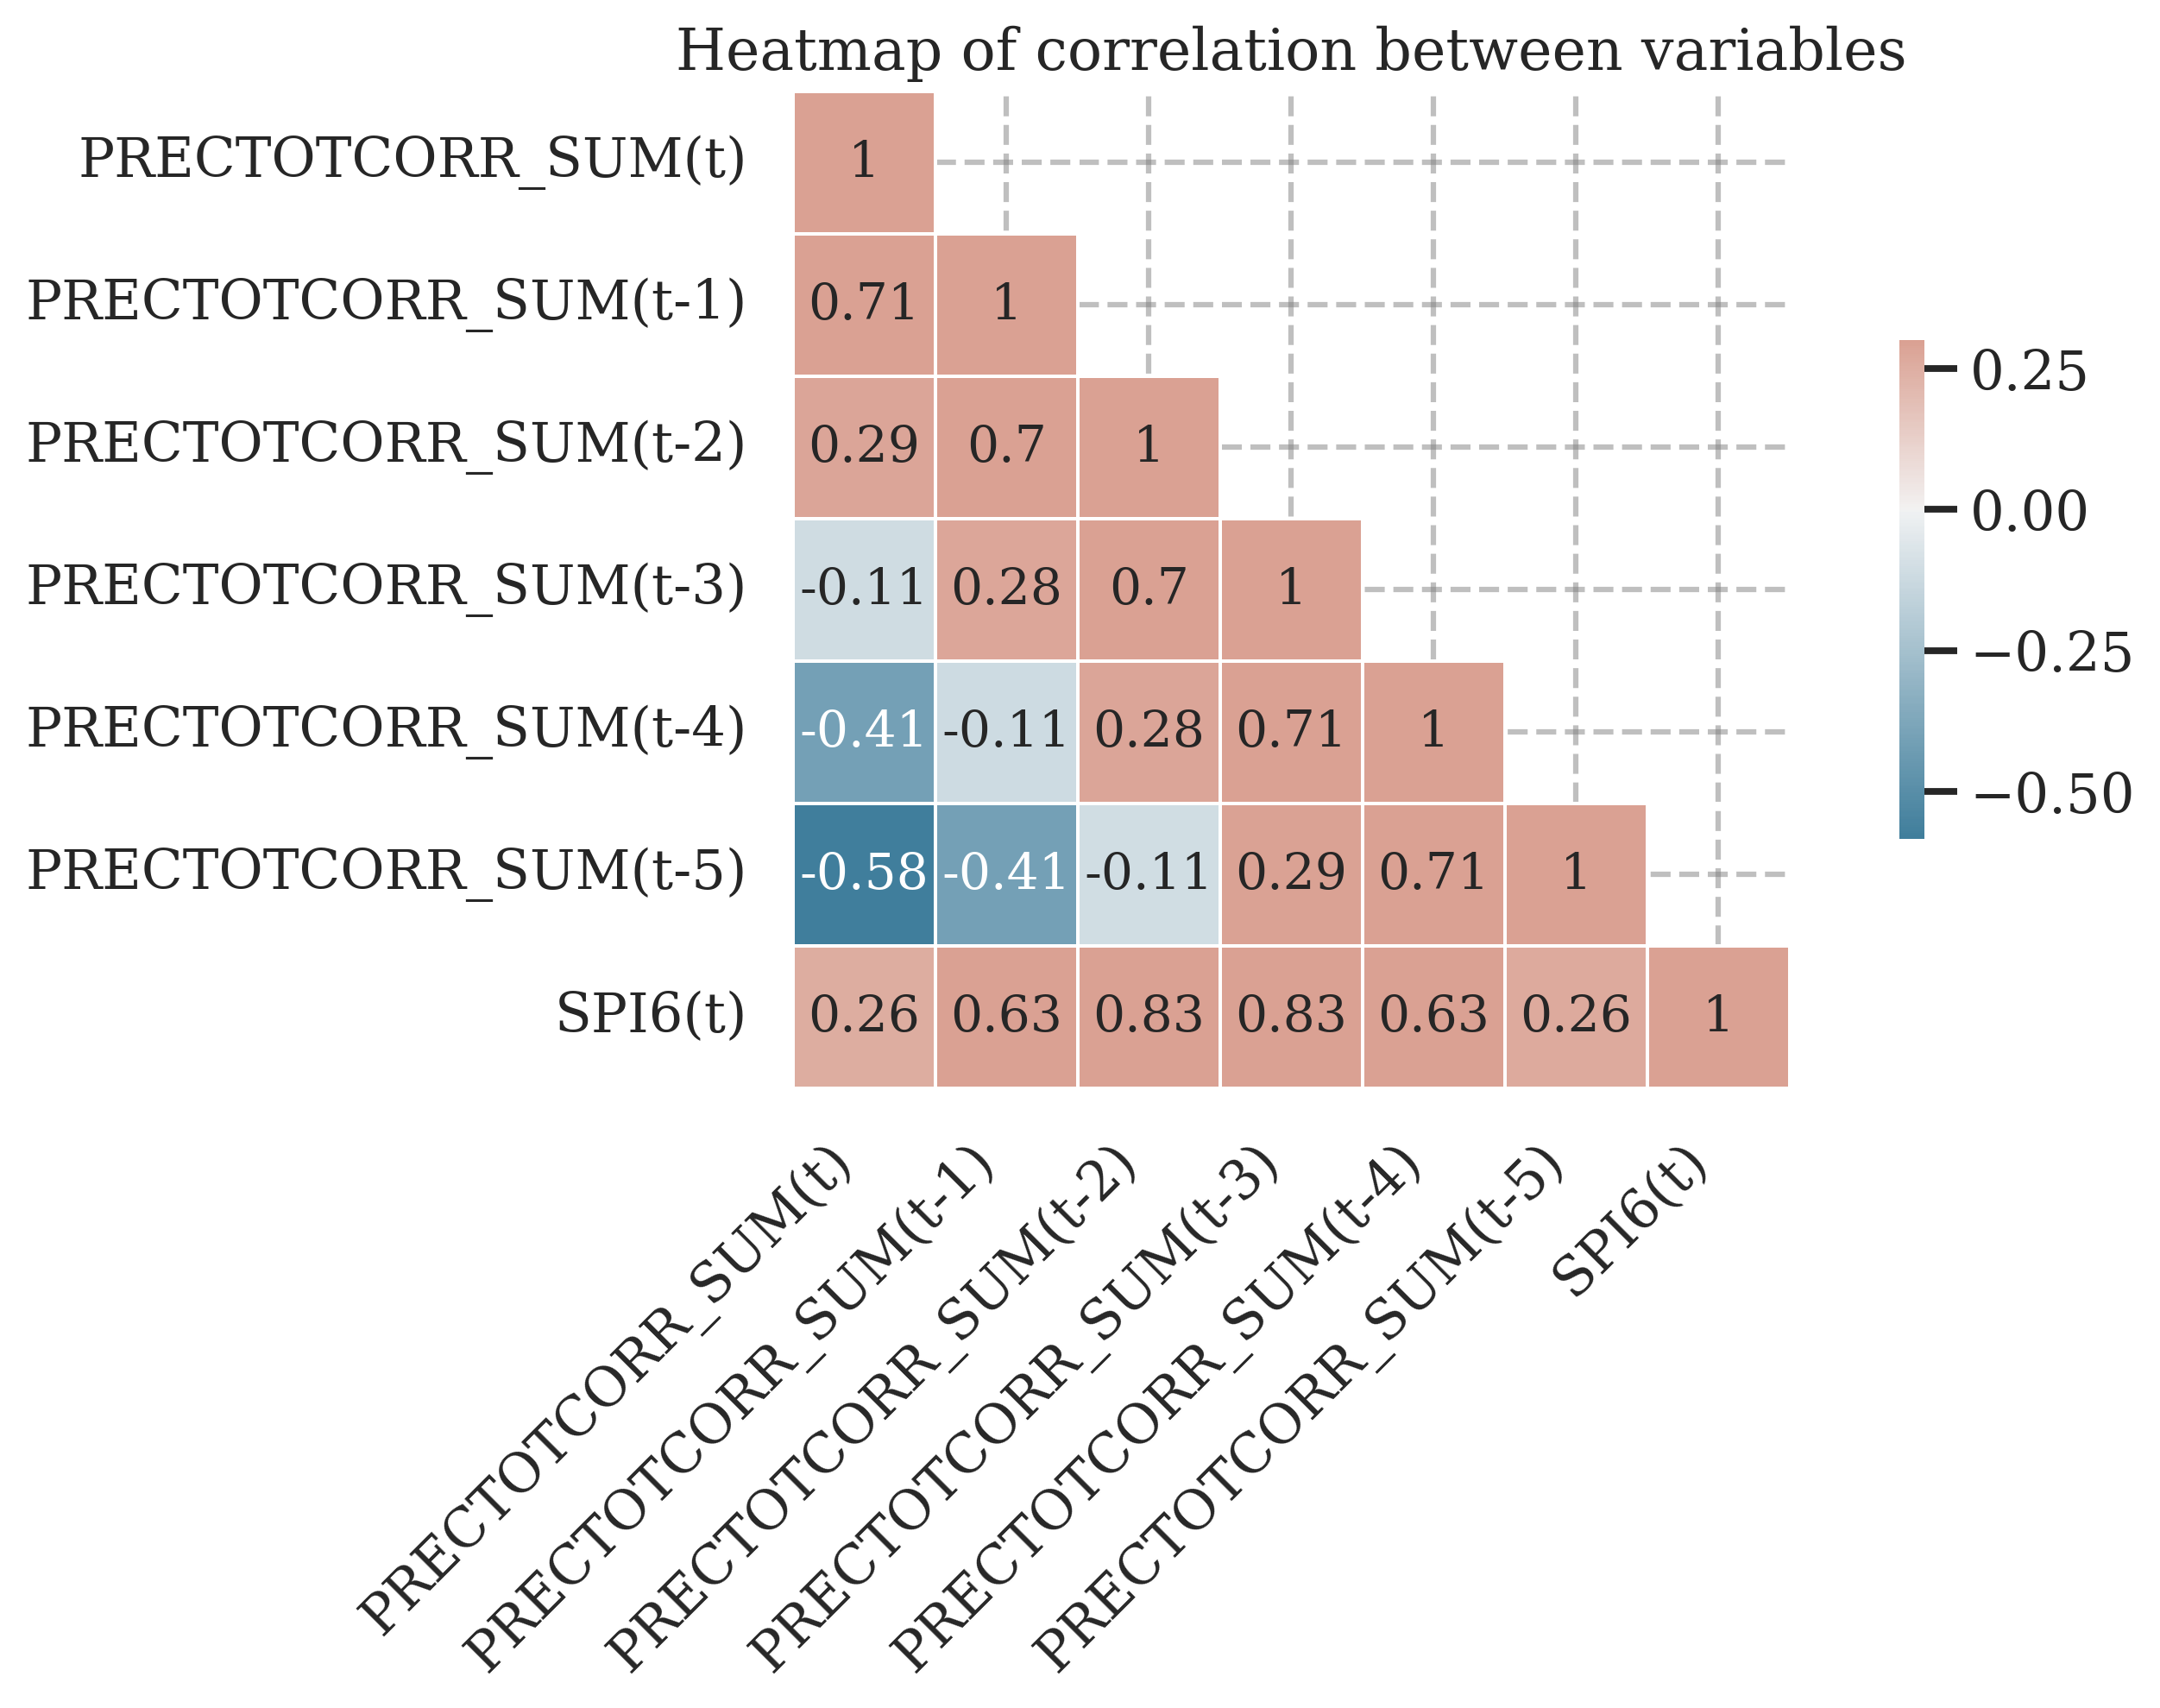

In [44]:
# Compute the correlation matrix : SPI6 and lag PRECTOTCORR_SUM

dfm6 = lagged_data[['PRECTOTCORR_SUM(t)','PRECTOTCORR_SUM(t-1)', 'PRECTOTCORR_SUM(t-2)', 
                    'PRECTOTCORR_SUM(t-3)','PRECTOTCORR_SUM(t-4)', 'PRECTOTCORR_SUM(t-5)','SPI6(t)']]

corr = dfm6.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [45]:
np.abs(dfm6.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)                 1.000000
PRECTOTCORR_SUM(t-3)    0.833438
PRECTOTCORR_SUM(t-2)    0.831156
PRECTOTCORR_SUM(t-4)    0.634403
PRECTOTCORR_SUM(t-1)    0.627359
PRECTOTCORR_SUM(t-5)    0.264000
PRECTOTCORR_SUM(t)      0.255719
Name: SPI6(t), dtype: float64

le lag 3 est le plus correllé PRECTOTCORR_SUM(t-3)    0.83

In [46]:
lagged_selected_columns.append('PRECTOTCORR_SUM(t-3)')

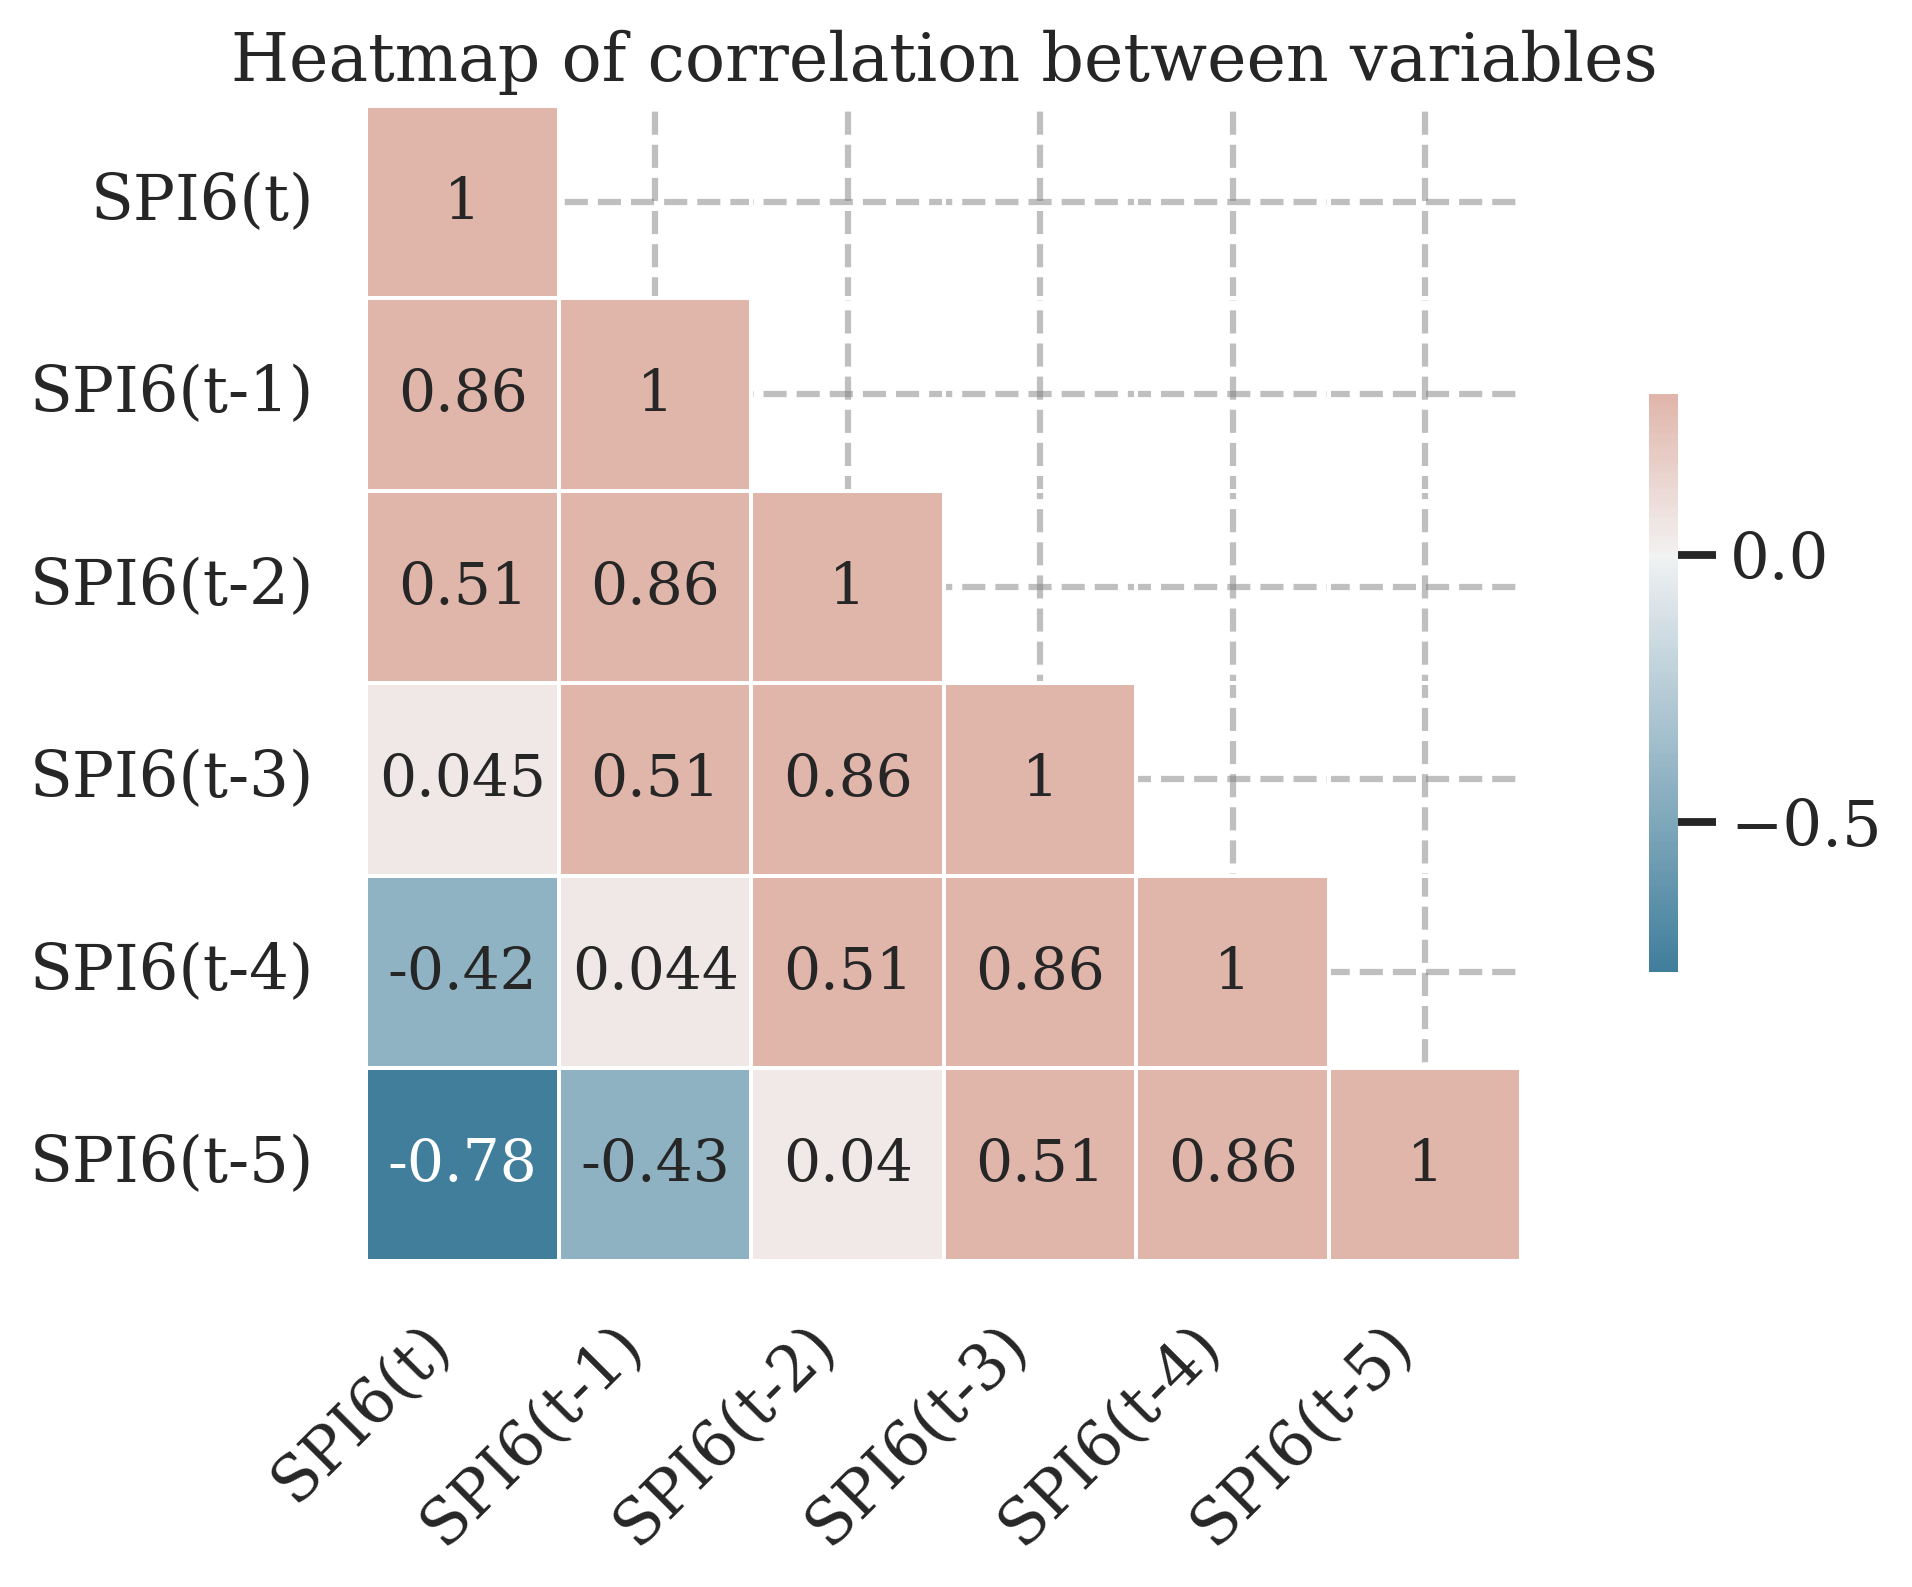

In [47]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm7 = lagged_data[['SPI6(t)','SPI6(t-1)', 'SPI6(t-2)', 
                    'SPI6(t-3)','SPI6(t-4)', 'SPI6(t-5)']]

corr = dfm7.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [48]:
np.abs(dfm7.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
SPI6(t-1)    0.862945
SPI6(t-5)    0.781227
SPI6(t-2)    0.511693
SPI6(t-4)    0.424630
SPI6(t-3)    0.045111
Name: SPI6(t), dtype: float64

##### le lag 1 est le plus correllé SPI6(t-1)    0.862

In [49]:
lagged_selected_columns.append('SPI6(t-1)')

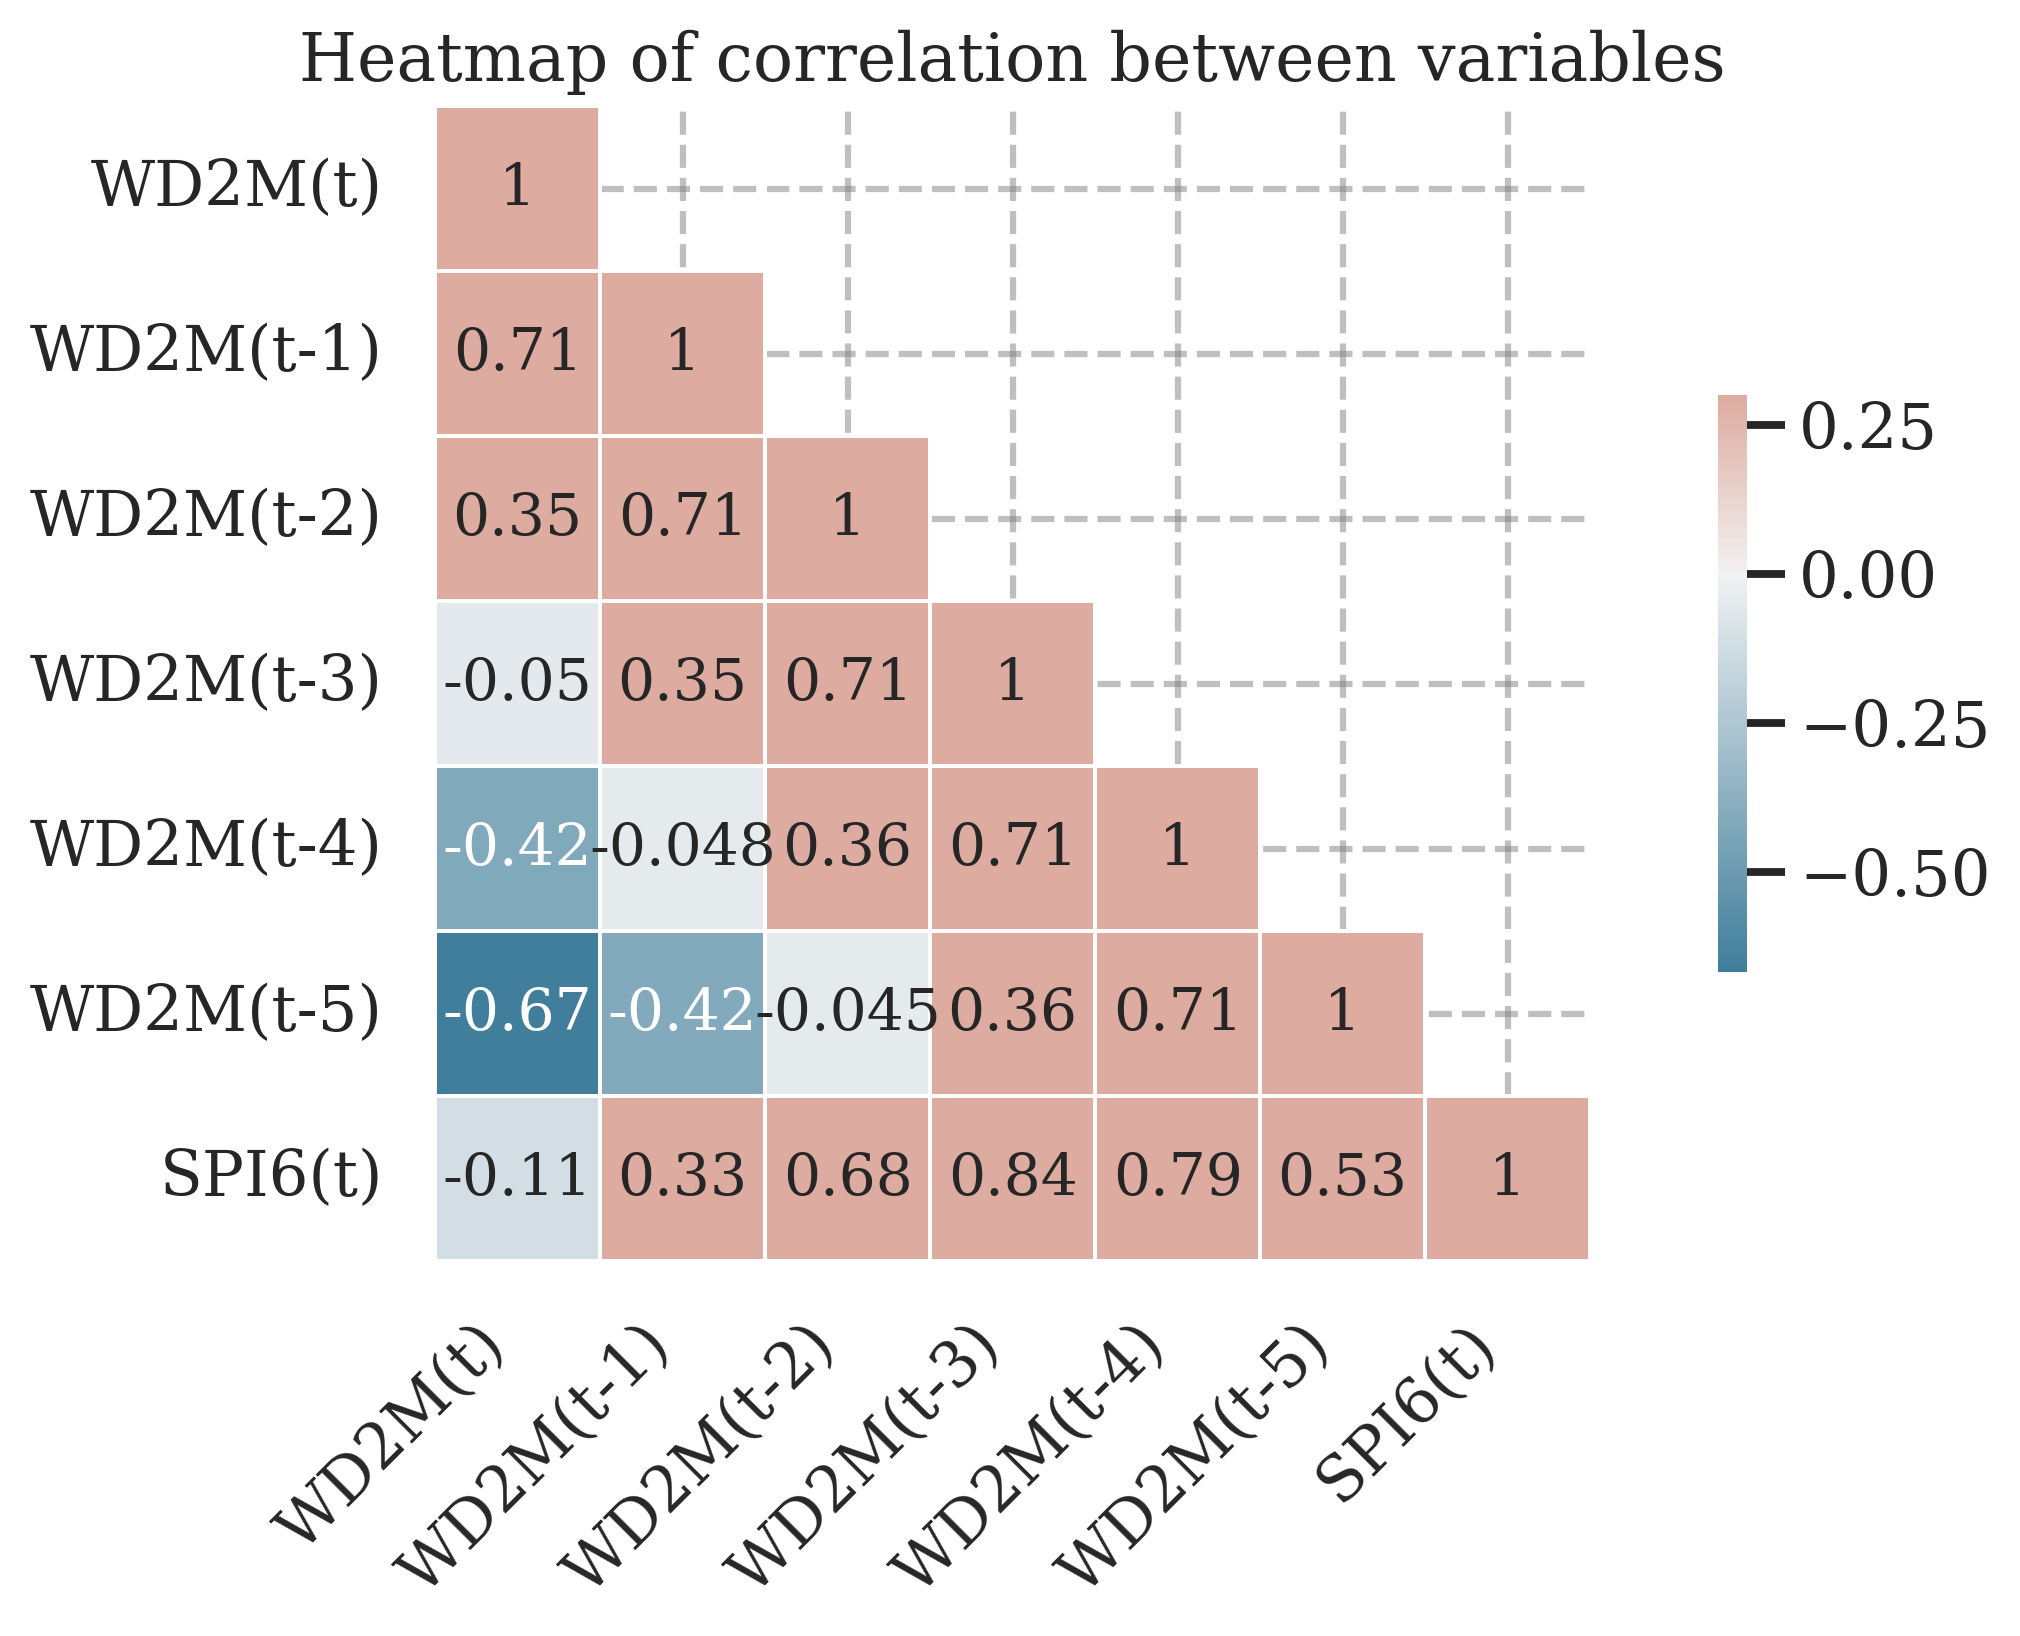

In [50]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm8 = lagged_data[['WD2M(t)','WD2M(t-1)', 'WD2M(t-2)', 
                    'WD2M(t-3)','WD2M(t-4)', 'WD2M(t-5)', 'SPI6(t)']]
corr = dfm8.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [51]:
np.abs(dfm8.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WD2M(t-3)    0.843513
WD2M(t-4)    0.794230
WD2M(t-2)    0.678789
WD2M(t-5)    0.527812
WD2M(t-1)    0.334762
WD2M(t)      0.111319
Name: SPI6(t), dtype: float64

##### The 3rd lag has the highest correlation of 0.843

In [52]:
lagged_selected_columns.append('WD2M(t-3)')

New dataset by choosing each  new lag

In [53]:
#lagged_selected_columns, 
len(lagged_selected_columns)

9

In [54]:
print(lagged_selected_columns)

['SPI6(t)', 'PS(t-1)', 'T2M(t)', 'RH2M(t-2)', 'WS2M(t-1)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t-3)', 'SPI6(t-1)', 'WD2M(t-3)']


In [55]:
final_lagged_data = lagged_data[lagged_selected_columns] 

final_lagged_data

,SPI6(t),PS(t-1),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),WD2M(t-3)
DATE,,,,,,,,,
1981-11-30,1.330927,0.047619,-0.528418,0.912302,-0.814516,-0.1250,0.342477,1.652523,0.599968
1981-12-31,0.721630,0.190476,-0.534562,0.695945,-0.379032,-0.4375,-0.205476,1.330927,0.504772
1982-01-31,-0.141574,0.166667,-0.462366,0.152715,-0.419355,-0.6250,-1.000000,0.721630,0.308766
1982-02-28,-0.886282,0.095238,-0.175115,-0.192577,0.048387,-0.7500,-1.000000,-0.141574,-0.551367
1982-03-31,-1.326341,-0.166667,0.262673,-0.567010,-0.088710,-0.8125,-1.000000,-0.886282,-0.602534
...,...,...,...,...,...,...,...,...,...
2021-08-31,1.042519,0.452381,-0.301075,0.628866,-0.322581,0.0000,-0.635702,-0.016338,0.460662
2021-09-30,1.545549,0.357143,-0.236559,0.835052,-0.717742,0.5000,-0.183915,1.042519,0.399471
2021-10-31,1.574756,0.309524,-0.021505,0.984605,-0.887097,0.3125,0.012625,1.545549,0.592429


### Create lags with raw data to prevent data leakage
To prevent data leakage, we save the not normalized data, and then we will split, then normalize the training data, and finally, apply the normalization parameters to the test data.

In [56]:
final_lagged_data.columns

Index(['SPI6(t)', 'PS(t-1)', 'T2M(t)', 'RH2M(t-2)', 'WS2M(t-1)', 'GWETPROF(t)',
       'PRECTOTCORR_SUM(t-3)', 'SPI6(t-1)', 'WD2M(t-3)'],
      dtype='object')

In [57]:
data.columns

Index(['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM',
       'SPI6'],
      dtype='object')

In [58]:
lagged_data_raw = create_lagged_features(data= data, 
                                      col_names=data.columns,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data_raw.head()

,PS(t-5),T2M(t-5),RH2M(t-5),WD2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),...,PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WD2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,97.80,27.66,72.50,213.81,2.23,0.54,189.84,-0.344705,97.83,25.20,...,0.00,1.652523,97.77,23.76,56.12,83.50,1.97,0.62,0.00,1.330927
1981-12-31,97.83,25.20,83.19,228.88,2.10,0.61,268.95,0.518499,97.82,25.15,...,0.00,1.330927,97.76,23.72,43.56,77.12,1.92,0.57,0.00,0.721630
1982-01-31,97.82,25.15,83.88,227.06,1.53,0.66,258.40,1.347842,97.84,25.10,...,0.00,0.721630,97.73,24.19,29.94,43.00,2.50,0.54,0.00,-0.141574
1982-02-28,97.84,25.10,83.75,215.19,1.41,0.73,152.93,1.821761,97.71,26.22,...,0.00,-0.141574,97.62,26.06,38.62,68.19,2.33,0.52,26.37,-0.886282
1982-03-31,97.71,26.22,75.88,190.75,1.43,0.70,0.00,1.652523,97.77,23.76,...,26.37,-0.886282,97.53,28.91,42.00,102.50,2.31,0.51,15.82,-1.326341


In [59]:
lagged_data_path = data_params['data_path'] + 'lagged/' + data_params['city'] + '_lagged_raw.csv'
lagged_data_raw[final_lagged_data.columns].to_csv(lagged_data_path)

In [60]:
lagged_data_raw

,PS(t-5),T2M(t-5),RH2M(t-5),WD2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),...,PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WD2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,97.80,27.66,72.50,213.81,2.23,0.54,189.84,-0.344705,97.83,25.20,...,0.00,1.652523,97.77,23.76,56.12,83.50,1.97,0.62,0.00,1.330927
1981-12-31,97.83,25.20,83.19,228.88,2.10,0.61,268.95,0.518499,97.82,25.15,...,0.00,1.330927,97.76,23.72,43.56,77.12,1.92,0.57,0.00,0.721630
1982-01-31,97.82,25.15,83.88,227.06,1.53,0.66,258.40,1.347842,97.84,25.10,...,0.00,0.721630,97.73,24.19,29.94,43.00,2.50,0.54,0.00,-0.141574
1982-02-28,97.84,25.10,83.75,215.19,1.41,0.73,152.93,1.821761,97.71,26.22,...,0.00,-0.141574,97.62,26.06,38.62,68.19,2.33,0.52,26.37,-0.886282
1982-03-31,97.71,26.22,75.88,190.75,1.43,0.70,0.00,1.652523,97.77,23.76,...,26.37,-0.886282,97.53,28.91,42.00,102.50,2.31,0.51,15.82,-1.326341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,97.50,30.49,37.44,128.19,2.76,0.51,0.00,-1.106327,97.46,31.43,...,194.91,-0.016338,97.84,25.24,86.38,225.00,1.55,0.64,329.91,1.042519
2021-09-30,97.46,31.43,45.62,193.12,2.80,0.50,28.24,-1.371114,97.60,30.80,...,329.91,1.042519,97.82,25.66,84.12,196.75,1.34,0.72,156.73,1.545549
2021-10-31,97.60,30.80,59.25,209.69,2.66,0.50,70.12,-1.146061,97.78,27.72,...,156.73,1.545549,97.71,27.06,75.00,154.62,1.27,0.69,37.34,1.574756


In [61]:
pd.read_csv('../datasets/lagged/Gogounou_lagged_raw.csv').describe()

,SPI6(t),PS(t-1),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),WD2M(t-3)
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.00000,482.000000,482.000000,482.000000
mean,-0.010365,97.699813,27.172822,56.745021,2.099585,0.55444,75.673568,-0.008699,157.483734
std,0.996558,0.142605,2.476556,21.989485,0.498459,0.06382,90.241304,0.998667,68.245414
min,-1.461751,97.270000,20.690000,14.190000,1.200000,0.48000,0.000000,-1.461751,27.560000
25%,-0.970941,97.600000,25.520000,37.050000,1.672500,0.51000,0.000000,-0.970941,79.200000
50%,-0.023094,97.730000,26.430000,59.750000,2.120000,0.53000,31.640000,-0.023094,191.315000
75%,0.840062,97.800000,29.017500,77.880000,2.450000,0.59000,142.380000,0.840062,216.717500
max,2.532608,98.110000,33.710000,86.940000,3.680000,0.80000,384.960000,2.532608,276.940000
